# Анализ удовлетворенности клиентов. Исследование комфорта при работе климатического оборудования.
 
**Цель:** Нам нужно определить, в какой тип оборудования стоит инвестировать больше в каждом регионе, чтобы максимизировать удовлетворённость пользователей, и какие факторы стоит учесть при развитии бизнеса. 

**Источник данных:** Был предоставлен файл названием "
Данные по использованию климатических систем" где дана информация об использовании климатических систем, таких как: кондиционирование, вентиляция в разных странах и городах для проведения полного анализа, а так же внешние источники с интернета.   
**Основные этапы:** 
- Исследование данных на качество и предобработка
- Проведение расчётов и исследований
- Проверка гипотез
- Регрессионное моделирование



### Импортируем все нужные библиотеки:

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import f_oneway, kruskal, mannwhitneyu, pearsonr, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

### 1. Загружаем файлы и сохраняем а так же смотрим данные до обработки 

In [129]:
input_path = r"C:\Users\user\OneDrive\Рабочий стол\Проекты\Новая папка\Данные по использованию климатических систем.csv"
output_path = r"C:\Users\user\OneDrive\Рабочий стол\Проекты\Новая папка\cleaned_data_new.csv"
df = pd.read_csv(input_path, sep=';', decimal='.', encoding='utf-8')
print("Данные до предобработки:")
pd.set_option('display.max_columns', None)
df.head(10)

Данные до предобработки:


,Год,Время года,Климат,Город,Страна,Способ охлаждения,Режим при смешанном типе охлаждения,Способ обогрева,Возраст,Пол,Ощущение температуры,Ощущение температуры (bool),Предпочтительное изменение температуры,Ощущение движения воздуха (bool),Предпочтительное изменение движения воздуха,Оценка комфорта,Утепление,Температура воздуха в помещении,Температура воздуха на улице,RH,Скорость воздуха,Рост,Вес,Занавески,Вентилятор,Окно,Двери,Отопление,Среднемесячная температура на улице,Количество рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,0.0,1.0,Без изменений,NaN,Без изменений,3.5,0.54,22.9,22.8,48.9,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,-2.0,1.0,Без изменений,NaN,Без изменений,6.0,0.61,74.8,23.7,39.2,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,1.0,1.0,Без изменений,NaN,Без изменений,5.0,0.57,25.6,24.5,34.7,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,-0.5,0.0,Теплее,NaN,Без изменений,2.5,0.61,24.2,23.8,50.0,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,0.0,1.0,Без изменений,NaN,Меньше,4.5,0.57,23.8,24.1,35.8,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
5,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,0.0,1.0,Без изменений,NaN,Без изменений,5.0,0.54,24.0,23.9,34.8,0.21,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
6,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,32.0,NaN,-1.0,1.0,Теплее,NaN,Меньше,3.5,0.57,24.7,24.8,42.2,0.10,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
7,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,30.0,NaN,-2.0,1.0,Теплее,NaN,Без изменений,4.3,0.61,74.8,23.6,40.0,0.09,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
8,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,0.0,1.0,Без изменений,NaN,Без изменений,5.0,0.57,25.5,25.5,34.7,0.15,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
9,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,43.0,NaN,1.0,0.0,Холоднее,NaN,Больше,4.0,0.61,76.4,24.4,34.5,0.34,NaN,NaN,0.0,0.0,NaN,NaN,NaN,31.7,0


#### 1.1 Так же дополнительная информация об ячейках данных о их и видах. А так же про размеры данных
**Отзыв об данных** - по списку данных и про пропускам мы явно понимаем что данные нуждаются в обработке, так как много пропусков, присутствуют выбросы а так же не правильное название колонок и их категоризация. И нужно привезти к PEP-8




In [130]:
print("Размер данных (строки, столбцы):", df.shape)
print("\nТипы данных и пропуски:")
df.info()

Размер данных (строки, столбцы): (484, 30)

Типы данных и пропуски:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Год                                          484 non-null    float64
 1   Время года                                   484 non-null    object 
 2   Климат                                       484 non-null    object 
 3   Город                                        484 non-null    object 
 4   Страна                                       484 non-null    object 
 5   Способ охлаждения                            484 non-null    object 
 6   Режим при смешанном типе охлаждения          337 non-null    object 
 7   Способ обогрева                              222 non-null    object 
 8   Возраст                                      413 non-null    float64
 9   Пол     

#### 1.2 Начинаем заниматься нормализацией колонок и приводить ее в соответствии с PEP-8 видом: 
- нужно убрать все пропуски и пробелы в названиях а так же заменить заглавные буквы на нижний регистр
- так же нужно переименовать некоторые столбцы с английскими bool, а так же сократить названия некоторых колонок для удобства

In [131]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[ \(\)]", "_", regex=True)
      .str.replace(r"_+", "_", regex=True)
      .str.strip("_")
)
print("Колонки после нормализации:\n", df.columns.tolist())
print("\n")
df.head(3)

Колонки после нормализации:
 ['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения', 'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст', 'пол', 'ощущение_температуры', 'ощущение_температуры_bool', 'предпочтительное_изменение_температуры', 'ощущение_движения_воздуха_bool', 'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта', 'утепление', 'температура_воздуха_в_помещении', 'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес', 'занавески', 'вентилятор', 'окно', 'двери', 'отопление', 'среднемесячная_температура_на_улице', 'количество_рекламаций']




,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_bool,предпочтительное_изменение_температуры,ощущение_движения_воздуха_bool,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,0.0,1.0,Без изменений,NaN,Без изменений,3.5,0.54,22.9,22.8,48.9,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,-2.0,1.0,Без изменений,NaN,Без изменений,6.0,0.61,74.8,23.7,39.2,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,1.0,1.0,Без изменений,NaN,Без изменений,5.0,0.57,25.6,24.5,34.7,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0


In [132]:
#2. Переименование столбцов:
rename_columns = {
    'ощущение_температуры_bool': 'ощущение_температуры_булево',
    'ощущение_движения_воздуха_bool': 'ощущение_движения_воздуха_булево',
    'предпочтительное_изменение_температуры': 'предпочтение_температуры',
    'среднемесячная_температура_на_улице': 'среднемесячная_температура_улица'
}
df = df.rename(columns=rename_columns)

#### 1.3 Преобразование столбцов в правильный вид данных:
- преобразует строки в числа
- заменяем некорректные значения с н/д на NaN чтобы их можно было обработать отдельно, с помощью errors='coerce'

In [133]:
# Преобразуем рекламации в числовой вид
if 'количество_рекламаций' in df.columns:
    df['количество_рекламаций'] = pd.to_numeric(df['количество_рекламаций'], errors='coerce')
# Так же преобразуем и оценку комфорта
if 'оценка_комфорта' in df.columns:
    df['оценка_комфорта'] = pd.to_numeric(df['оценка_комфорта'], errors='coerce')
# Преобразуем так же ощущение температуры в числовой вид
if 'ощущение_температуры' in df.columns:
    df['ощущение_температуры'] = pd.to_numeric(df['ощущение_температуры'], errors='coerce')

#### 1.4 Исправление типов
**План действий** 
- У нас есть несколько категориальных столбцов - 'страна','город','способ_охлаждения',
'режим_при_смешанном_типе_охлаждения','способ_обогрева','пол' - нужно им дать соответсвующий тип для оптимизации процесса в дальнейшем
- так же есть 'ощущение_температуры_булево','ощущение_движения_воздуха_булево' колонки, которые мы сможем сразу проставить не_применимо в пустых ячейках
- так же обрабатываем год и возраст на цифровые типы данных. А так же можем заполнить пустые пропуски на NaN

In [134]:
# Категориальные столбцы
cat_columns = ['страна','город','способ_охлаждения',
            'режим_при_смешанном_типе_охлаждения','способ_обогрева','пол']
for col in cat_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [135]:
# Логические, если есть пустые строки то вставляем 'не_применимо'
bool_columns = ['ощущение_температуры_булево','ощущение_движения_воздуха_булево']
for col in bool_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.add_categories('не_применимо').fillna('не_применимо')

In [136]:
df['год'] = df['год'].astype('Int64')
df['возраст'] = pd.to_numeric(df.get('возраст', pd.Series()), errors='coerce')

##### 1.4.1 Смотрим и оцениваем что в итоге получилось после исправления типов: 


In [137]:
df.head(5)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_булево,предпочтение_температуры,ощущение_движения_воздуха_булево,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_улица,количество_рекламаций
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,0.0,1.0,Без изменений,не_применимо,Без изменений,3.5,0.54,22.9,22.8,48.9,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,-2.0,1.0,Без изменений,не_применимо,Без изменений,6.0,0.61,74.8,23.7,39.2,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,1.0,1.0,Без изменений,не_применимо,Без изменений,5.0,0.57,25.6,24.5,34.7,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,-0.5,0.0,Теплее,не_применимо,Без изменений,2.5,0.61,24.2,23.8,50.0,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,0.0,1.0,Без изменений,не_применимо,Меньше,4.5,0.57,23.8,24.1,35.8,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0


In [138]:
df.sample(5)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_булево,предпочтение_температуры,ощущение_движения_воздуха_булево,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_улица,количество_рекламаций
266,2010,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Мужской,0.0,1.0,Без изменений,1.0,Без изменений,NaN,0.55,25.2,NaN,59.7,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0
322,2012,Лето,Жаркий полузасушливый,Ахмедабад,Индия,Смешанный,Кондиционирование,NaN,45.0,Мужской,0.0,1.0,Без изменений,не_применимо,Без изменений,4.0,0.61,33.7,NaN,54.3,0.32,157.5,55.0,NaN,1.0,1.0,NaN,NaN,29.5,0
262,2010,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Вентиляция,Механическое отопление,45.0,Мужской,0.0,1.0,Без изменений,1.0,Без изменений,NaN,0.39,21.9,NaN,59.2,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0
110,2010,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,0.0,1.0,Без изменений,1.0,Без изменений,NaN,0.46,24.6,NaN,70.1,0.08,NaN,NaN,NaN,NaN,0.0,0.0,NaN,22.0,0
20,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,41.0,NaN,0.0,1.0,Без изменений,не_применимо,Без изменений,3.5,0.61,23.6,23.6,41.8,0.17,NaN,NaN,1.0,1.0,NaN,NaN,NaN,91.0,0


In [139]:
df.dtypes

год                                               Int64
время_года                                       object
климат                                           object
город                                          category
страна                                         category
способ_охлаждения                              category
режим_при_смешанном_типе_охлаждения            category
способ_обогрева                                category
возраст                                         float64
пол                                            category
ощущение_температуры                            float64
ощущение_температуры_булево                    category
предпочтение_температуры                         object
ощущение_движения_воздуха_булево               category
предпочтительное_изменение_движения_воздуха      object
оценка_комфорта                                 float64
утепление                                       float64
температура_воздуха_в_помещении                 

### 2 Обработка выбросов
**План** 
- Для начала используем 3 IQR для убирания только явных выбросов. 




#### 2.1.1 Данные до обработки выбросов: 

In [140]:
exclude_iqr = ['возраст', 'рост' , 'вес' , 'температура_воздуха_на_улице', 'среднемесячная_температура_улица','оценка_комфорта','количество_рекламаций']

print("Анализ выбросов до обработки:")
for col in df.select_dtypes(include=np.number).columns:
    if col in exclude_iqr:
        continue
    
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 3*iqr, q3 + 3*iqr 
    
    outliers_count = (~df[col].between(low, high)).sum()
    print(f"Колонка {col}: {outliers_count} выбросов (границы: {low:.2f} — {high:.2f})")

Анализ выбросов до обработки:
Колонка год: 0 выбросов (границы: 2004.00 — 2018.00)
Колонка ощущение_температуры: 0 выбросов (границы: -3.00 — 4.00)
Колонка утепление: 15 выбросов (границы: -0.26 — 1.42)
Колонка температура_воздуха_в_помещении: 28 выбросов (границы: 17.50 — 32.20)
Колонка rh: 0 выбросов (границы: -15.87 — 120.97)
Колонка скорость_воздуха: 32 выбросов (границы: -0.18 — 0.38)
Колонка занавески: 412 выбросов (границы: -3.00 — 4.00)
Колонка вентилятор: 338 выбросов (границы: -3.00 — 4.00)
Колонка окно: 274 выбросов (границы: 0.00 — 0.00)
Колонка двери: 356 выбросов (границы: 0.00 — 0.00)
Колонка отопление: 422 выбросов (границы: 1.00 — 1.00)


#### 2.2 Обрабатываем выбросы и заменяем на медиану

In [141]:
for col in df.select_dtypes(include=np.number).columns:
    if col in exclude_iqr:
        continue
    
    q1, q3 = df[col].quantile([0.25, 0.75])
    med = df[col].median()
    iqr = q3 - q1
    low, high = q1 - 3*iqr, q3 + 3*iqr
    
    df[col] = np.where(df[col].between(low, high), df[col], med)

#### 2.3 Отдельно обрабатываем Рост и Вес
- так как очень много пропусков, в этих двух колоннах, решено было пропуски и выбросы заменить на медиану, и разделить на 2 разные категории по полу, на мужской и женский а так же общую медиану для всех, если в пол будет не указан, мы считаем это правильным решением так как нет половины данных чтобы просто убрать выбросы на медиану
- для начала гистограмма до обработки чтобы узнать есть ли выбросы 

 

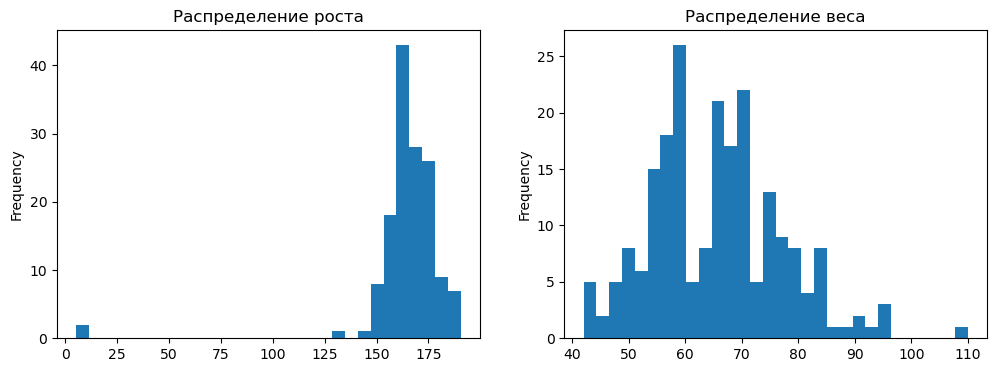

In [142]:
# Гистограммы для роста и веса
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['рост'].plot(kind='hist', bins=30, ax=axes[0], title='Распределение роста')
df['вес'].plot(kind='hist', bins=30, ax=axes[1], title='Распределение веса')
plt.show()

#### 2.3.1 Далее каждый пол расчитываем отдельно друг от друга чтобы составить их отдельную медиану для будущего заполнения 

In [143]:

# считаем средние для мужчин и женщин
median_male = df[df["пол"] == "Мужской"][["рост", "вес"]].median()
median_female = df[df["пол"] == "Женский"][["рост", "вес"]].median()

# общая для не_указан и выбросов 
median_total = df[["рост", "вес"]].median()

# замена выбросов
def replace_outliers(row):
    if row["пол"] == "Мужской":
        row["рост"] = row["рост"] if 100 <= row["рост"] <= 250 else median_male["рост"]
        row["вес"] = row["вес"] if 30 <= row["вес"] <= 200 else median_male["вес"]
    elif row["пол"] == "Женский":
        row["рост"] = row["рост"] if 100 <= row["рост"] <= 250 else median_female["рост"]
        row["вес"] = row["вес"] if 30 <= row["вес"] <= 200 else median_female["вес"]
    else:
        row["рост"] = row["рост"] if 100 <= row["рост"] <= 250 else median_total["рост"]
        row["вес"] = row["вес"] if 30 <= row["вес"] <= 200 else median_total["вес"]
    return row

# применение этой функции
df = df.apply(replace_outliers, axis=1)

#### 2.3.2 Гистограмма после обработки роста и веса

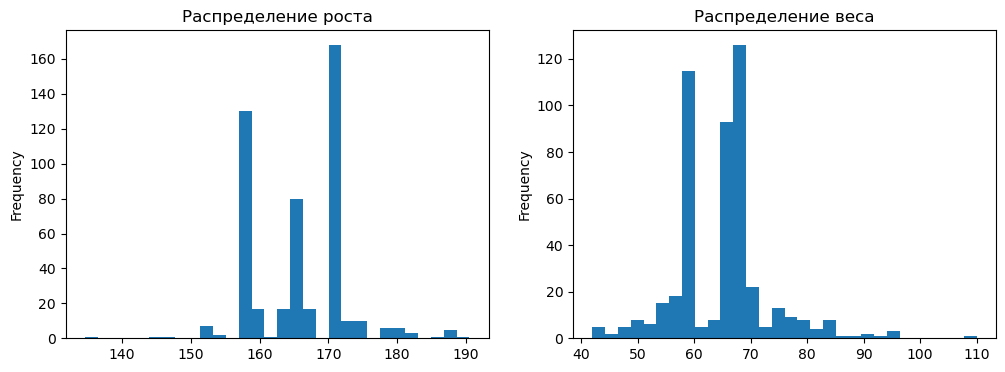

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['рост'].plot(kind='hist', bins=30, ax=axes[0], title='Распределение роста')
df['вес'].plot(kind='hist', bins=30, ax=axes[1], title='Распределение веса')
plt.show()

In [145]:
df.sample(10)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_булево,предпочтение_температуры,ощущение_движения_воздуха_булево,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_улица,количество_рекламаций
169,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,65.0,Женский,1.1,0.0,Холоднее,0.0,Больше,NaN,0.42,24.1,NaN,55.6,0.13,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
135,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Мужской,0.0,1.0,Без изменений,1.0,Без изменений,NaN,0.58,23.5,NaN,57.6,0.10,170.20,68.0,1.0,1.0,0.0,0.0,1.0,22.0,0
180,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,25.0,Женский,0.0,1.0,Без изменений,1.0,Без изменений,NaN,0.56,24.0,NaN,75.7,0.07,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
222,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Женский,3.0,0.0,Холоднее,0.0,Больше,NaN,0.39,24.4,NaN,69.0,0.26,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
166,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,35.0,Женский,2.0,0.0,Холоднее,0.0,Больше,NaN,0.39,25.0,NaN,65.4,0.04,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
293,2012.0,Лето,Жаркий полузасушливый,Ахмедабад,Индия,Смешанный,Кондиционирование,NaN,55.0,Мужской,3.0,0.0,Холоднее,не_применимо,Больше,4.0,0.79,24.6,NaN,42.2,0.31,157.50,56.0,1.0,1.0,0.0,0.0,1.0,29.5,0
353,2012.0,Лето,Жаркий полузасушливый,Ахмедабад,Индия,Смешанный,Кондиционирование,NaN,45.0,Мужской,0.5,1.0,Холоднее,не_применимо,Больше,5.0,0.61,29.4,NaN,75.5,0.10,160.00,73.0,1.0,1.0,0.0,0.0,1.0,29.5,0
15,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,31.0,NaN,0.0,1.0,Без изменений,не_применимо,Без изменений,5.0,0.67,24.0,23.8,35.3,0.11,165.10,65.0,1.0,1.0,0.0,0.0,1.0,29.4,0
379,2012.0,Осень,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,-1.0,0.0,Холоднее,не_применимо,Без изменений,NaN,0.72,24.8,NaN,51.0,0.13,170.20,80.0,1.0,1.0,0.0,0.0,1.0,29.7,0
339,2012.0,Зима,Тропическая влажная саванна,Бангалор,Индия,Кондиционирование,NaN,NaN,25.0,Мужской,0.0,1.0,Без изменений,не_применимо,Больше,6.0,0.75,24.5,NaN,54.3,0.08,180.30,72.0,1.0,0.0,0.0,0.0,1.0,29.9,0


#### 2.4 Обрабатываем выбросы по Температуре за месяц
- было принято решение взять за верхний порог 50 градусов, так как нигде в мире не бывает выше 50 градусов на улице. Рекорд по температурев в мире был 55 Градусов по цельсии
- на счет температуры в помещении, мы сделали это в общем, так как там было выбросов меньше 5%, соответственно можно было заменить медианой. А среднемесячная температура воздуха нужна будет потом для добавления к температуре на улице, поэтому важно ее правильно обработать 

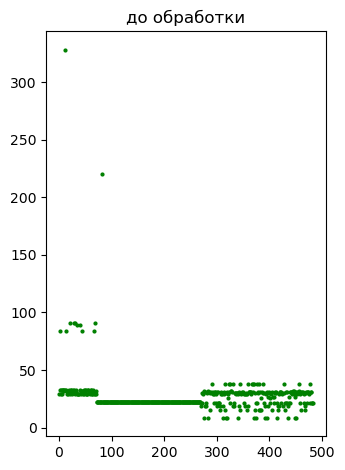

In [146]:
plt.subplot(1, 2, 2)
plt.plot(df['среднемесячная_температура_улица'], 'o', markersize=2, color='green')
plt.title('до обработки')

plt.tight_layout()
plt.show()

In [147]:
if 'среднемесячная_температура_улица' in df.columns:
    temperature = 50
    mean_val = df.loc[df['среднемесячная_температура_улица'] <= temperature, 'среднемесячная_температура_улица'].mean()
    mask = df['среднемесячная_температура_улица'] > temperature
    print(f"\nВыбросы температуры: {mask.sum()} записей (>50°C)")
    df.loc[mask, 'среднемесячная_температура_улица'] = mean_val




Выбросы температуры: 12 записей (>50°C)


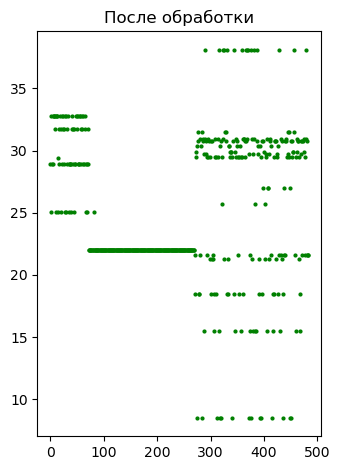

In [148]:
plt.subplot(1, 2, 2)
plt.plot(df['среднемесячная_температура_улица'], 'o', markersize=2, color='green')
plt.title('После обработки')

plt.tight_layout()
plt.show()

In [149]:

df.sample(6)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_булево,предпочтение_температуры,ощущение_движения_воздуха_булево,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_улица,количество_рекламаций
252,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Женский,1.1,0.0,Холоднее,0.0,Больше,NaN,0.43,25.1,NaN,71.7,0.11,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
128,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Женский,0.0,1.0,Без изменений,1.0,Без изменений,NaN,0.63,24.2,NaN,43.5,0.09,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
427,2012.0,Весна,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,-1.0,1.0,Холоднее,не_применимо,Больше,NaN,0.75,27.3,NaN,53.0,0.03,158.75,63.0,1.0,1.0,0.0,0.0,1.0,30.4,0
155,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Женский,1.0,0.0,Холоднее,1.0,Больше,NaN,0.52,25.0,NaN,64.0,0.06,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
177,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Женский,1.0,0.0,Холоднее,0.0,Больше,NaN,0.42,24.4,NaN,59.6,0.06,158.75,58.0,1.0,1.0,0.0,0.0,1.0,22.0,0
189,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,35.0,Мужской,1.2,1.0,Без изменений,1.0,Без изменений,NaN,0.46,25.4,NaN,70.2,0.12,170.20,68.0,1.0,1.0,0.0,0.0,1.0,22.0,0


### 3 Обработка пропусков

#### 3.1 Гистограмма до обработки пропусков: 

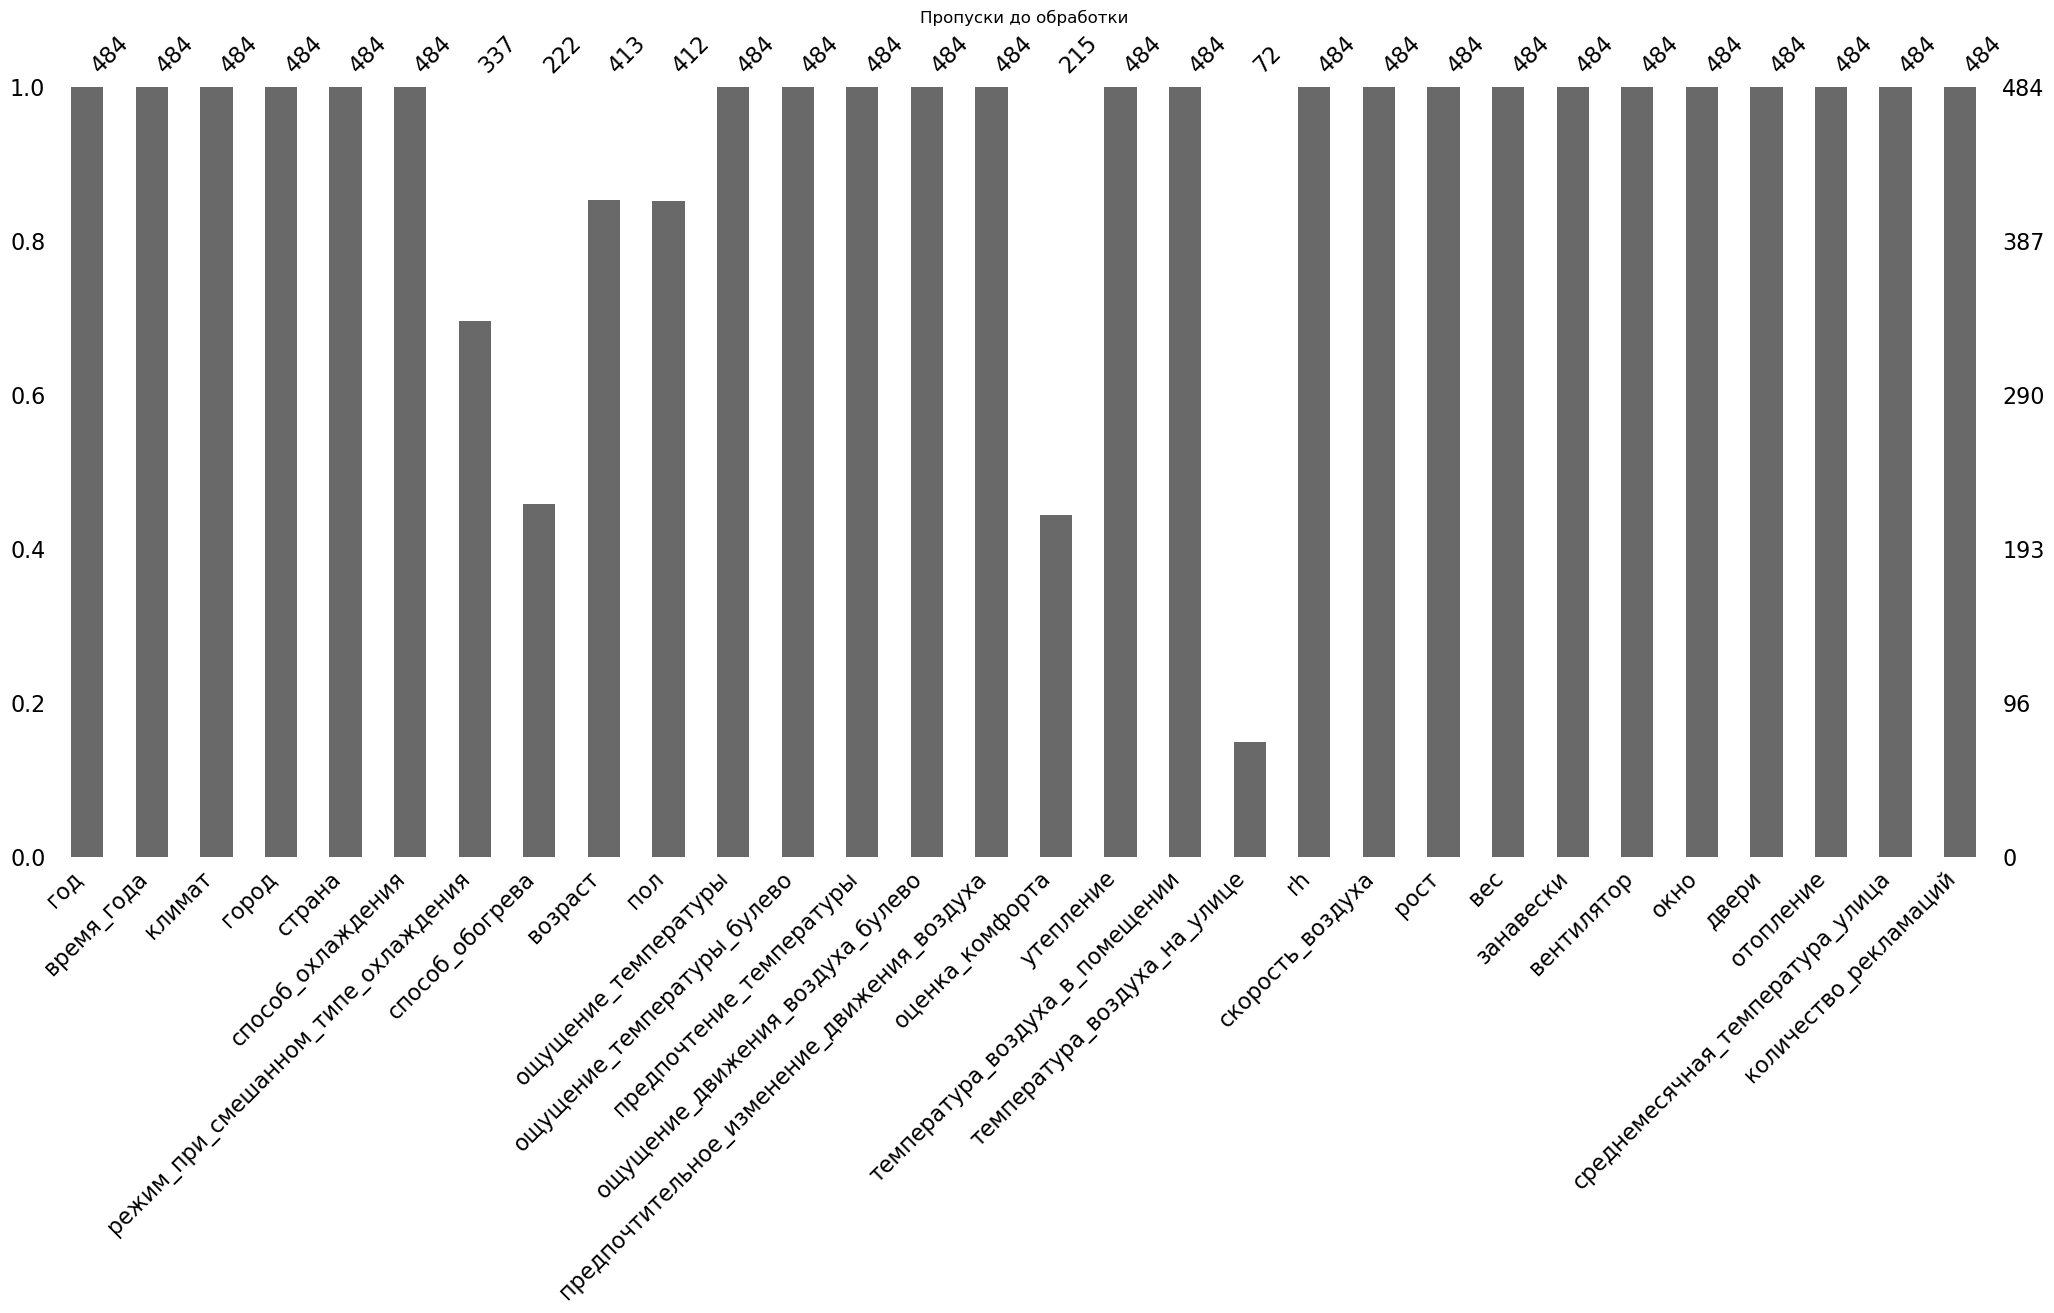

In [150]:
msno.bar(df)
plt.title("Пропуски до обработки")
plt.show()

#### 3.2 Обработка температуры воздуха на улице. 
- в общем проблема была в том что было всего 72 значения, но есть еще и среднемесячная температура, которая плюс минус после редактирования выбросов целая и не тронутая с реальными показателями, было решено взять не хватающую часть температур на улице взять со среднемесячных, так как логически они подходят и не сильно отчаются между собой где есть реальные показатели.

In [151]:
df["температура_воздуха_на_улице"] = df.apply(
    lambda row: row["среднемесячная_температура_улица"] 
    if pd.isna(row["температура_воздуха_на_улице"]) 
    else row["температура_воздуха_на_улице"],
    axis=1
)

# проверка результата
print("Осталось пропусков:", df["температура_воздуха_на_улице"].isna().sum())
df.tail(5)

Осталось пропусков: 0


,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_булево,предпочтение_температуры,ощущение_движения_воздуха_булево,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_улица,количество_рекламаций
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,0.0,1.0,Теплее,не_применимо,Без изменений,5.0,0.46,31.6,30.9,69.1,0.32,172.70,50.0,1.0,1.0,0.0,0.0,1.0,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,-1.0,1.0,Без изменений,не_применимо,Без изменений,NaN,0.64,26.5,30.8,61.0,0.16,170.20,65.0,1.0,1.0,0.0,0.0,1.0,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,-1.0,1.0,Холоднее,не_применимо,Больше,NaN,0.74,26.9,21.6,42.0,0.02,158.75,76.0,1.0,1.0,0.0,0.0,1.0,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,-1.0,1.0,Холоднее,не_применимо,Больше,NaN,0.74,26.9,21.6,42.0,0.02,158.75,76.0,1.0,1.0,0.0,0.0,1.0,21.6,0
483,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,-1.0,1.0,Холоднее,не_применимо,Больше,NaN,0.74,26.9,21.6,42.0,0.02,158.75,76.0,1.0,1.0,0.0,0.0,1.0,21.6,0


### 3.3 Обработка пропусков в пол, режим охлаждения и способ обогрева: 
- так как там просто не дана информация, мы так и прописываем не указан, так как неоткуда все равно брать дополнительную информацию чтобы постораться их заполнить как то правильно.

In [152]:
fill_map = {
    'пол': 'не_указан',
    'режим_при_смешанном_типе_охлаждения': 'не_применимо',
    'способ_обогрева': 'не_применимо'
}

for col, val in fill_map.items():
    if col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            if val not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories(val)
            # Заполняем пропуски
            df[col] = df[col].fillna(val)
        else:
            df[col] = df[col].fillna(val)

C:\Users\user\AppData\Local\Temp\ipykernel_23940\3403505810.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


#### 3.4 Обработка оценки комфорта
- Поидее, да тут не правильно оформлять пропуски медианой так как почти 50% оценок не даны. Но с другой стороны не было по каким критериям можно оценить дополнительно на первый взгляд, и банально не хватает времени уже до дедлайна чтобы придумать более умный способ

In [153]:

for col in df.select_dtypes(include=np.number).columns:
    if col == 'оценка_комфорта':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

#### 3.5 Гистограмма после обработки данных

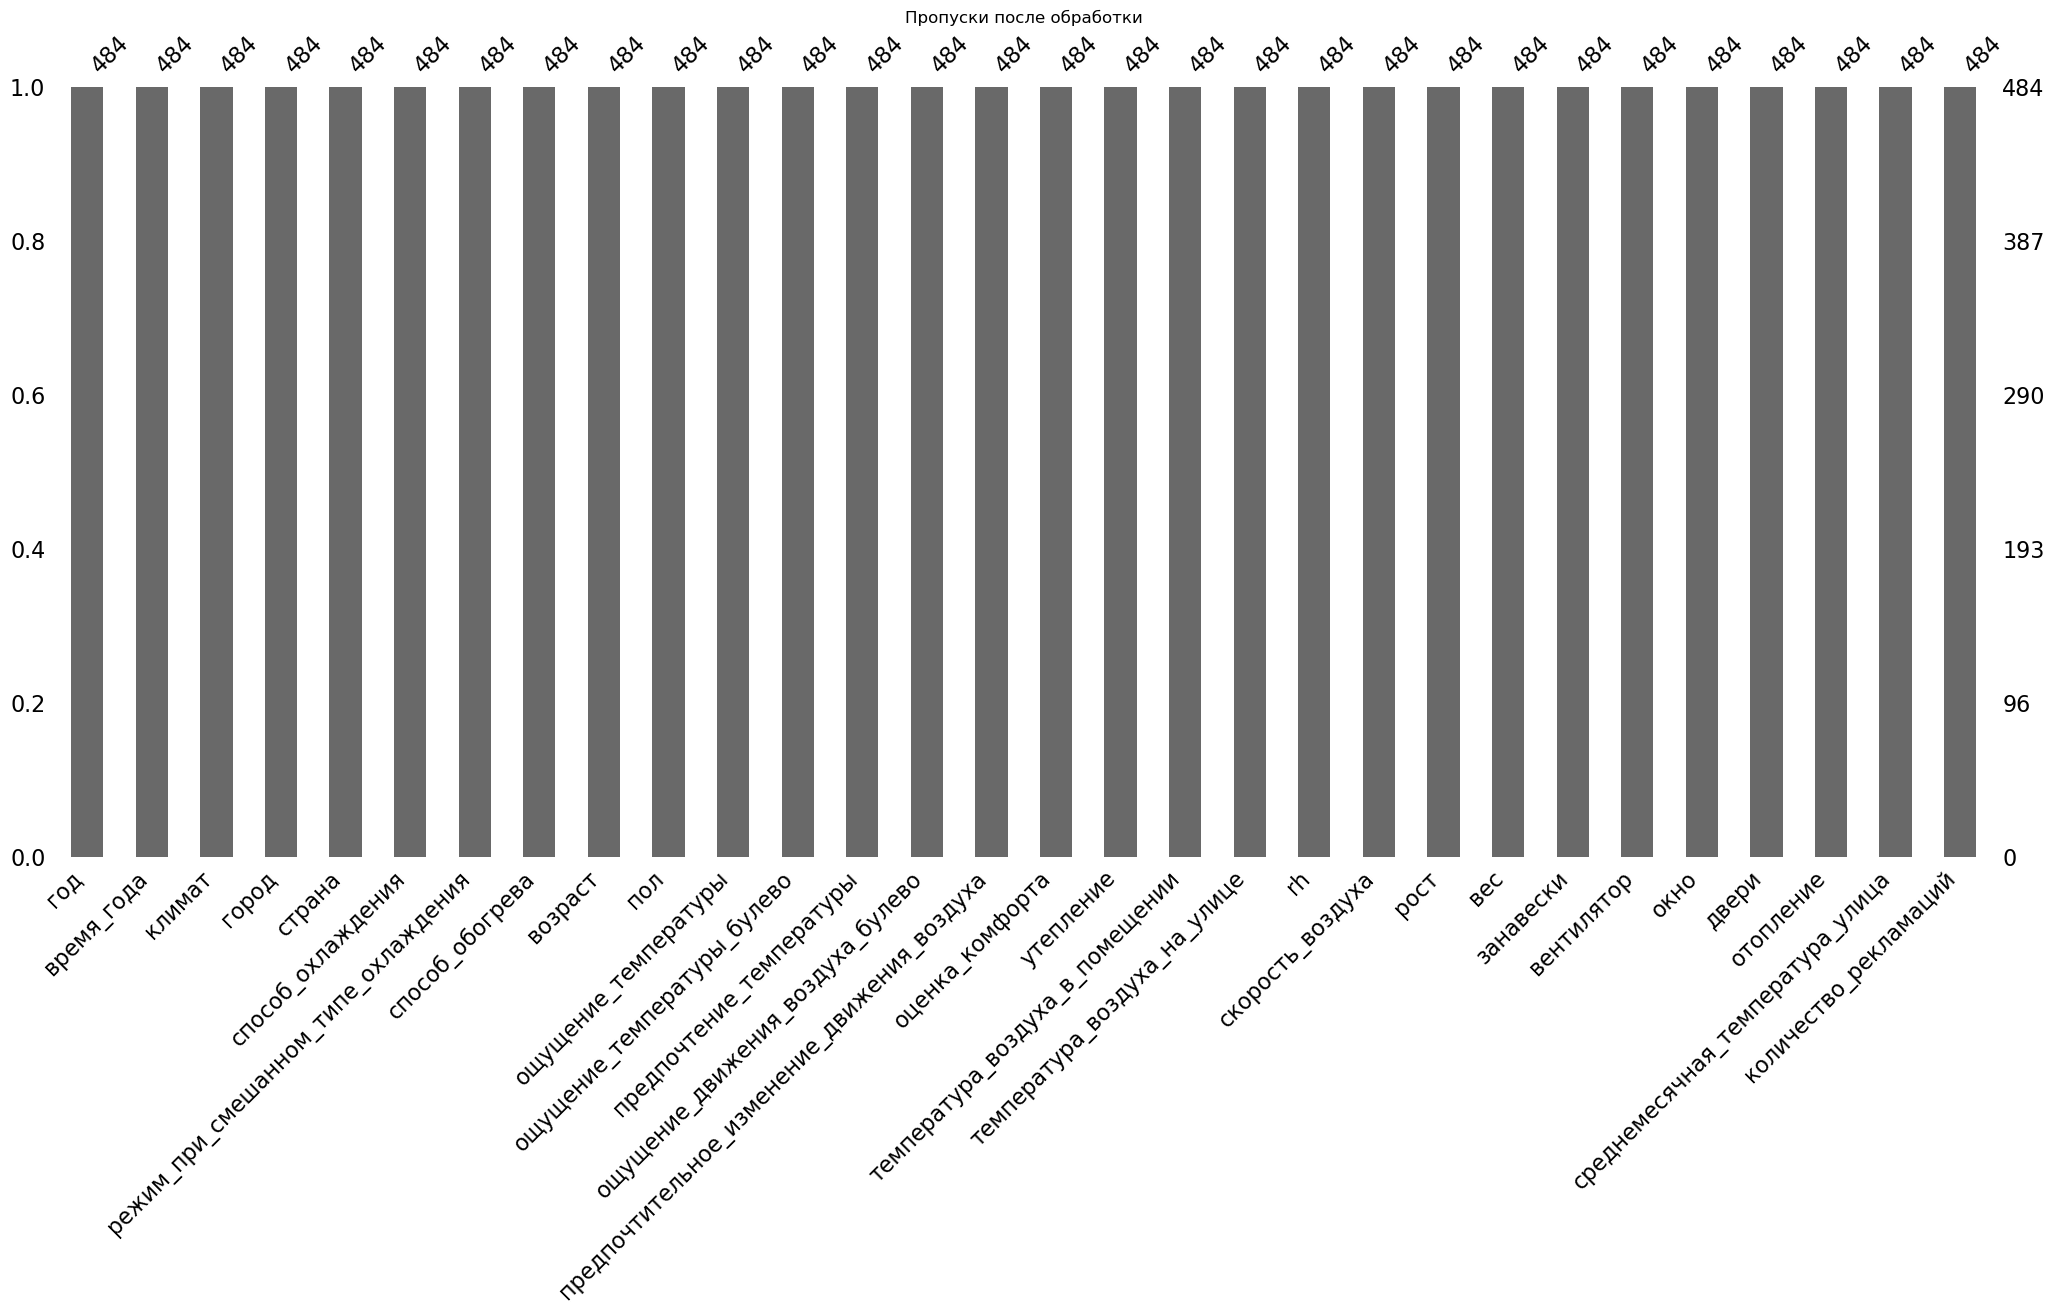

In [154]:
msno.bar(df)
plt.title("Пропуски после обработки")
plt.show()

#### 3.6 Удаление Дубликатов и замена слов


In [155]:
df = df.drop_duplicates()

In [156]:
if 'климат' in df.columns:
    df['климат'] = df['климат'].str.replace(
        'Cубтроп океанич','Субтропический океанический').astype('category')

### 4.1 Создание новых признаков.
- Уровень рекламаций, мало (≤1), средне (=2), много (>2), Оценка комфорта по шкале: От 1 (очень неудобно) до 6 (очень комфортно)

In [157]:
def recl_level(v):
    if pd.isna(v): return 'неизвестно'
    if v <= 1:     return 'мало'
    if v == 2:     return 'средне'
    return 'много'

In [158]:
df['уровень_рекламаций'] = df['количество_рекламаций'].apply(recl_level)

In [159]:
print("уровень рекламаций:", df['уровень_рекламаций'].value_counts().to_dict())

уровень рекламаций: {'мало': 472, 'много': 7, 'средне': 3}


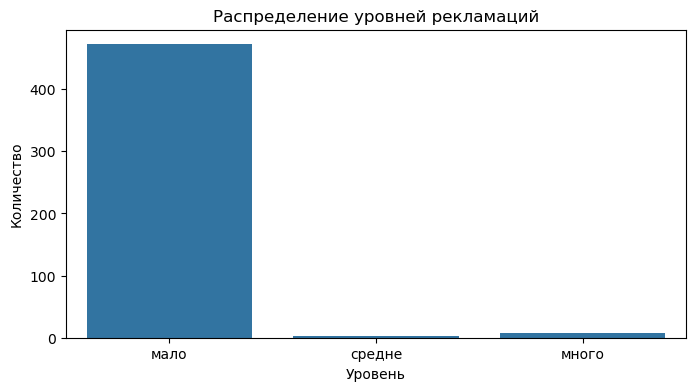

In [160]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='уровень_рекламаций', order=['мало', 'средне', 'много'])
plt.title('Распределение уровней рекламаций')
plt.xlabel('Уровень')
plt.ylabel('Количество')
plt.show()

#### 4.2 Оценка комфорта по шкале от 1 до 6

In [161]:
# Оценка комфорта по шкале: От 1 (очень неудобно) до 6 (очень комфортно)
if 'оценка_комфорта' in df.columns:
    df['оценка_комфорта_шкала'] = df['оценка_комфорта'].round().astype(int)
    comfort_bins = [-np.inf, 2, 3, 4, 5, np.inf]
    comfort_labels = ['очень_неудобно', 'неудобно', 'нормально', 'комфортно', 'очень_комфортно']
    df['категория_оценки_комфорта'] = pd.cut(
        df['оценка_комфорта_шкала'],
        bins=comfort_bins,
        labels=comfort_labels,
        right=True
    )

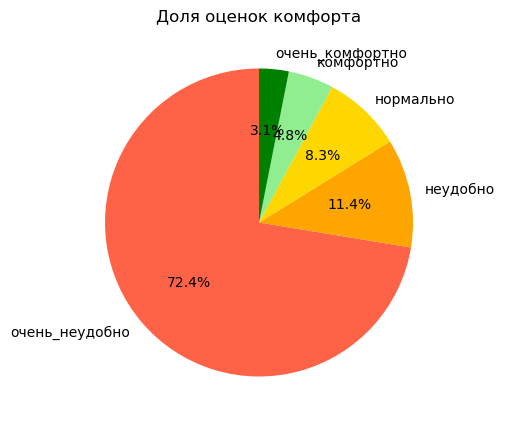

In [162]:
plt.figure(figsize=(10, 5))
order = ['очень_неудобно', 'неудобно', 'нормально', 'комфортно', 'очень_комфортно']
df['категория_оценки_комфорта'].value_counts().plot.pie(
    autopct='%.1f%%',
    labels=order,
    colors=['tomato', 'orange', 'gold', 'lightgreen', 'green'],
    startangle=90
)
plt.title('Доля оценок комфорта')
plt.ylabel('')
plt.show()

#### 4.3 Оценка температуры по ощущениям. 
- распределям по категориям от -3 до +3 по ощущению температуры на свое усмотрение   
        'очень_холодно',
        'холодно', 
        'нормально',
        'тепло',
        'очень_горячо'

In [163]:
if 'ощущение_температуры' in df.columns:

    
    df['оценка_ощущения_температуры'] = df['ощущение_температуры'].round().astype(int)
    conditions = [
        df['оценка_ощущения_температуры'].between(-3, -1, inclusive='right'),
        df['оценка_ощущения_температуры'].between(-1, 0, inclusive='left'),
        df['оценка_ощущения_температуры'] == 0,
        df['оценка_ощущения_температуры'].between(0, 1, inclusive='right'),
        df['оценка_ощущения_температуры'] > 1
    ]
    choices = [
        'очень_холодно',
        'холодно', 
        'нормально',
        'тепло',
        'очень_горячо'
    ]
    df['категория_температурного_ощущения'] = np.select(
        conditions, 
        choices, 
        default='неизвестно')

#### 4.4 Редактриуем возрастные группы и соответсвие влажности: 
- раздаем группы как было указано в тз по годам а так же влажность тоже по 40-60 метрике

In [164]:
df['возрастная_группа'] = pd.cut(
    df['возраст'], bins=[0,44,59,150], labels=['молодой','средний','пожилой'], right=False)

In [165]:
df['соответствие_влажности'] = np.where(
    df['rh'].between(40,60), 'соответствует', 'не_соответствует')

In [166]:
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Все готово")

Все готово


# Проведение расчётов и исследований

In [167]:
df = pd.read_csv('cleaned_data_new.csv')
cl1 = ['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
       'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст',
       'пол', 'ощущение_температуры', 'ощущение_температуры_булево',
       'предпочтение_температуры', 'ощущение_движения_воздуха_булево',
       'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении',
       'температура_воздуха_на_улице', 'rh']
cl2 = ['скорость_воздуха', 'рост', 'вес',
       'занавески', 'вентилятор', 'окно', 'двери', 'отопление',
       'среднемесячная_температура_улица', 'количество_рекламаций',
       'уровень_рекламаций', 'оценка_комфорта_шкала',
       'категория_оценки_комфорта', 'оценка_ощущения_температуры',
       'категория_температурного_ощущения', 'возрастная_группа',
       'соответствие_влажности']

### Посмотрим на данные разделив их на две группы, чтобы было легче ориентироваться

In [168]:
df[cl1].head(3)

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,ощущение_температуры,ощущение_температуры_булево,предпочтение_температуры,ощущение_движения_воздуха_булево,предпочтительное_изменение_движения_воздуха,оценка_комфорта,утепление,температура_воздуха_в_помещении,температура_воздуха_на_улице,rh
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,не_применимо,не_применимо,22.0,не_указан,0.0,1.0,Без изменений,не_применимо,Без изменений,3.5,0.54,22.9,22.8,48.9
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,не_применимо,не_применимо,40.0,не_указан,-2.0,1.0,Без изменений,не_применимо,Без изменений,6.0,0.61,24.6,23.7,39.2
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,не_применимо,не_применимо,42.0,не_указан,1.0,1.0,Без изменений,не_применимо,Без изменений,5.0,0.57,25.6,24.5,34.7


In [169]:
df[cl2].head(3)

,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_улица,количество_рекламаций,уровень_рекламаций,оценка_комфорта_шкала,категория_оценки_комфорта,оценка_ощущения_температуры,категория_температурного_ощущения,возрастная_группа,соответствие_влажности
0,0.26,165.1,65.0,1.0,1.0,0.0,0.0,1.0,28.900000,0,мало,4,нормально,0,нормально,молодой,соответствует
1,0.12,165.1,65.0,0.0,0.0,0.0,0.0,1.0,25.064831,0,мало,6,очень_комфортно,-2,очень_холодно,молодой,не_соответствует
2,0.08,165.1,65.0,0.0,0.0,0.0,0.0,1.0,32.800000,0,мало,5,комфортно,1,тепло,молодой,не_соответствует


### Рассчитаем средний возраст респондентов в зависимости от пола и региона
#### Но из-за того, что респонденты из США не указывали свой пол, то у них всё будет в одной группе

In [170]:
df.groupby(['страна', 'пол'])['возраст'].mean().reset_index()

,страна,пол,возраст
0,Австралия,Женский,46.348315
1,Австралия,Мужской,42.614679
2,Индия,Женский,38.447761
3,Индия,Мужской,39.496552
4,США,не_указан,36.208333


### Отобразим круговую диаграмму, которая показывает процентное соотношений разных возрастных групп

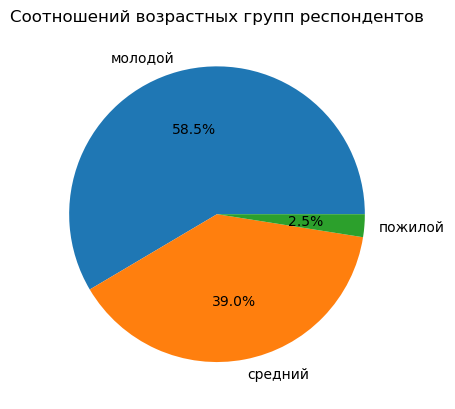

In [171]:
plt.pie(df['возрастная_группа'].value_counts(), labels=['молодой', 'средний', 'пожилой'], autopct='%1.1f%%')
plt.title('Соотношений возрастных групп респондентов')
plt.show()

### Мы рассчитали в том числе среднюю комфортную температуру в зависимости от возрастной категории

In [172]:
r = df[(df['ощущение_температуры_булево'] == 1) & \
    (df['предпочтение_температуры'] == 'Без изменений')] \
    .groupby('возрастная_группа')['температура_воздуха_в_помещении'].mean().reset_index()
r

,возрастная_группа,температура_воздуха_в_помещении
0,молодой,24.628000
1,пожилой,25.437500
2,средний,23.925424


##### делаем отсюда простой вывод: в среднем для разных возрастных групп комфортной считается температура 24 градуса по Цельсию

### Рассчитали медианное значение температуры и влажности для каждого типа охлаждения

In [173]:
df.groupby('способ_охлаждения')[['температура_воздуха_в_помещении', 'rh']].median().reset_index()

,способ_охлаждения,температура_воздуха_в_помещении,rh
0,Вентиляция,24.6,46.30
1,Кондиционирование,24.4,42.45
2,Смешанный,24.6,56.50


##### Вывод: в среднем при смешанном типе охлаждения относительная влажность воздуха выше, чем при других случаях. Значит есть причина исследовать данный тип охлаждения

## Добавим столбец с процентом удовлетворенных респондентов температурой воздуха в помещении относительно всех респондентов одной страны и одного пола

In [174]:
df['всего_людей'] = df.groupby(['страна', 'пол'])['страна'].transform('size')
df['количество_удовлетворенных'] = (
    df[df['ощущение_температуры_булево'] == 1]
    .groupby(['страна', 'пол'])['страна'].transform('size')
)
df['количество_удовлетворенных'] = df['количество_удовлетворенных'].fillna(0)
df['удовлетворенные, %'] = (df['количество_удовлетворенных'] / df['всего_людей']) * 100
df = df.drop(columns=['всего_людей', 'количество_удовлетворенных'])
df['удовлетворенные, %'].value_counts().reset_index()

,"удовлетворенные, %",count
0,80.000000,116
1,0.000000,102
2,88.073394,96
3,68.539326,61
4,75.000000,54
5,79.104478,53


##### Видно, что 102 человека не удовлетворены температурой воздуха, повод принять меры

## Составим сводную таблицу, в которой данные будут сгруппированы по стране, полу, возрастной группе и подсчитаны средняя температура воздуха в помещении, на улице и средняя относительная влажность для каждой из этих групп.

In [175]:
pivot_table = df.pivot_table(values=['температура_воздуха_в_помещении', 'температура_воздуха_на_улице', 'rh'], \
                             index=['страна', 'пол' , 'возрастная_группа'], aggfunc='mean')

pivot_table

rh  \
страна    пол       возрастная_группа              
Австралия Женский   молодой            61.368000   
                    пожилой            44.550000   
                    средний            61.266071   
          Мужской   молодой            61.668889   
                    пожилой            64.366667   
                    средний            61.680328   
Индия     Женский   молодой            49.886538   
                    средний            49.940000   
          Мужской   молодой            49.542000   
                    пожилой            78.800000   
                    средний            52.761364   
США       не_указан молодой            38.995000   
                    средний            38.808333   

                                       температура_воздуха_в_помещении  \
страна    пол       возрастная_группа                                    
Австралия Женский   молодой                                  23.840000   
                    пожилой                                  24.900000   
                    средний                                  24.112500   
          Мужской   молодой                                  24.146667   
                    пожилой                                  24.733333   
                    средний                                  24.044262   
Индия     Женский   молодой                                  25.976923   
                    средний                                  23.560000   
          Мужской   молодой                                  25.915000   
                    пожилой                                  29.300000   
                    средний                                  24.279545   
США       не_указан молодой                                  24.355000   
                    средний                                  24.458333   

                                       температура_воздуха_на_улице  
страна    пол       возрастная_группа                                
Австралия Женский   молодой                               22.000000  
                    пожилой                               22.000000  
                    средний                               22.054729  
          Мужской   молодой                               22.000000  
                    пожилой                               22.000000  
                    средний                               22.000000  
Индия     Женский   молодой                               27.986538  
                    средний                               21.833333  
          Мужской   молодой                               27.452000  
                    пожилой                               29.500000  
                    средний                               22.809091  
США       не_указан молодой                               24.101667  
                    средний                               24.116667

### Создадим новый категориальный столбец, в котором будет показано, удовлетворяет ли зафиксированная относительная влажность стандарту или нет. Категории: Удовлетворяет ГОСТу, Ниже нормы, Выше нормы.

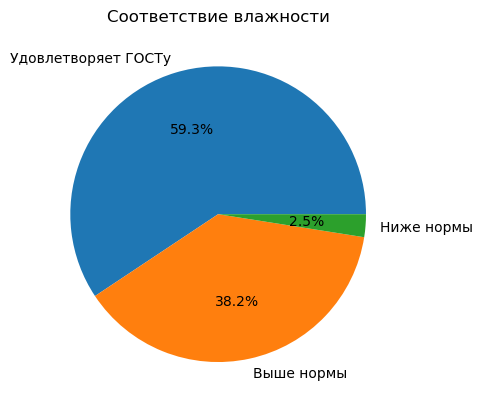

In [176]:
# Заполним новый столбец соответствие_влажности в соответсвии с ГОСТом 30494-2011 (https://meganorm.ru/Data2/1/4293788/4293788520.pdf):
def rh_test(x):
    if x.iloc[1] == 'Лето' or x.iloc[1] == 'Весна':
        if x.iloc[19] <= 60 and x.iloc[19] >= 30:
            return 'Удовлетворяет ГОСТу'
        elif x.iloc[19] <= 30:
            return 'Ниже нормы'
        return 'Выше нормы'
    else:
        if x.iloc[19] <= 45 and x.iloc[19] >= 30:
            return 'Удовлетворяет ГОСТу'
        elif x.iloc[19] <= 30:
            return 'Ниже нормы'
        return 'Выше нормы'
        
df['соответствие_влажности'] = df.apply(rh_test, axis=1)
plt.pie(df['соответствие_влажности'].value_counts(), labels=['Удовлетворяет ГОСТу', 'Выше нормы', 'Ниже нормы'], autopct='%1.1f%%')
plt.title('Соответствие влажности')
plt.show()

# способ_охлаждения    кол-во
# Смешанный            335
# Кондиционирование    114
# Вентиляция           33
# Исходя из графика и этих данных, медианного значения при определенном типе охлаждения можно сказать одно: при смешанном типе в среднем выше влажность,
# чем в других случаях, и так как почти 40% у нас выше нормы, то надо принять меры. Например, убавить кондиционеры со смешанным типом охлаждения.

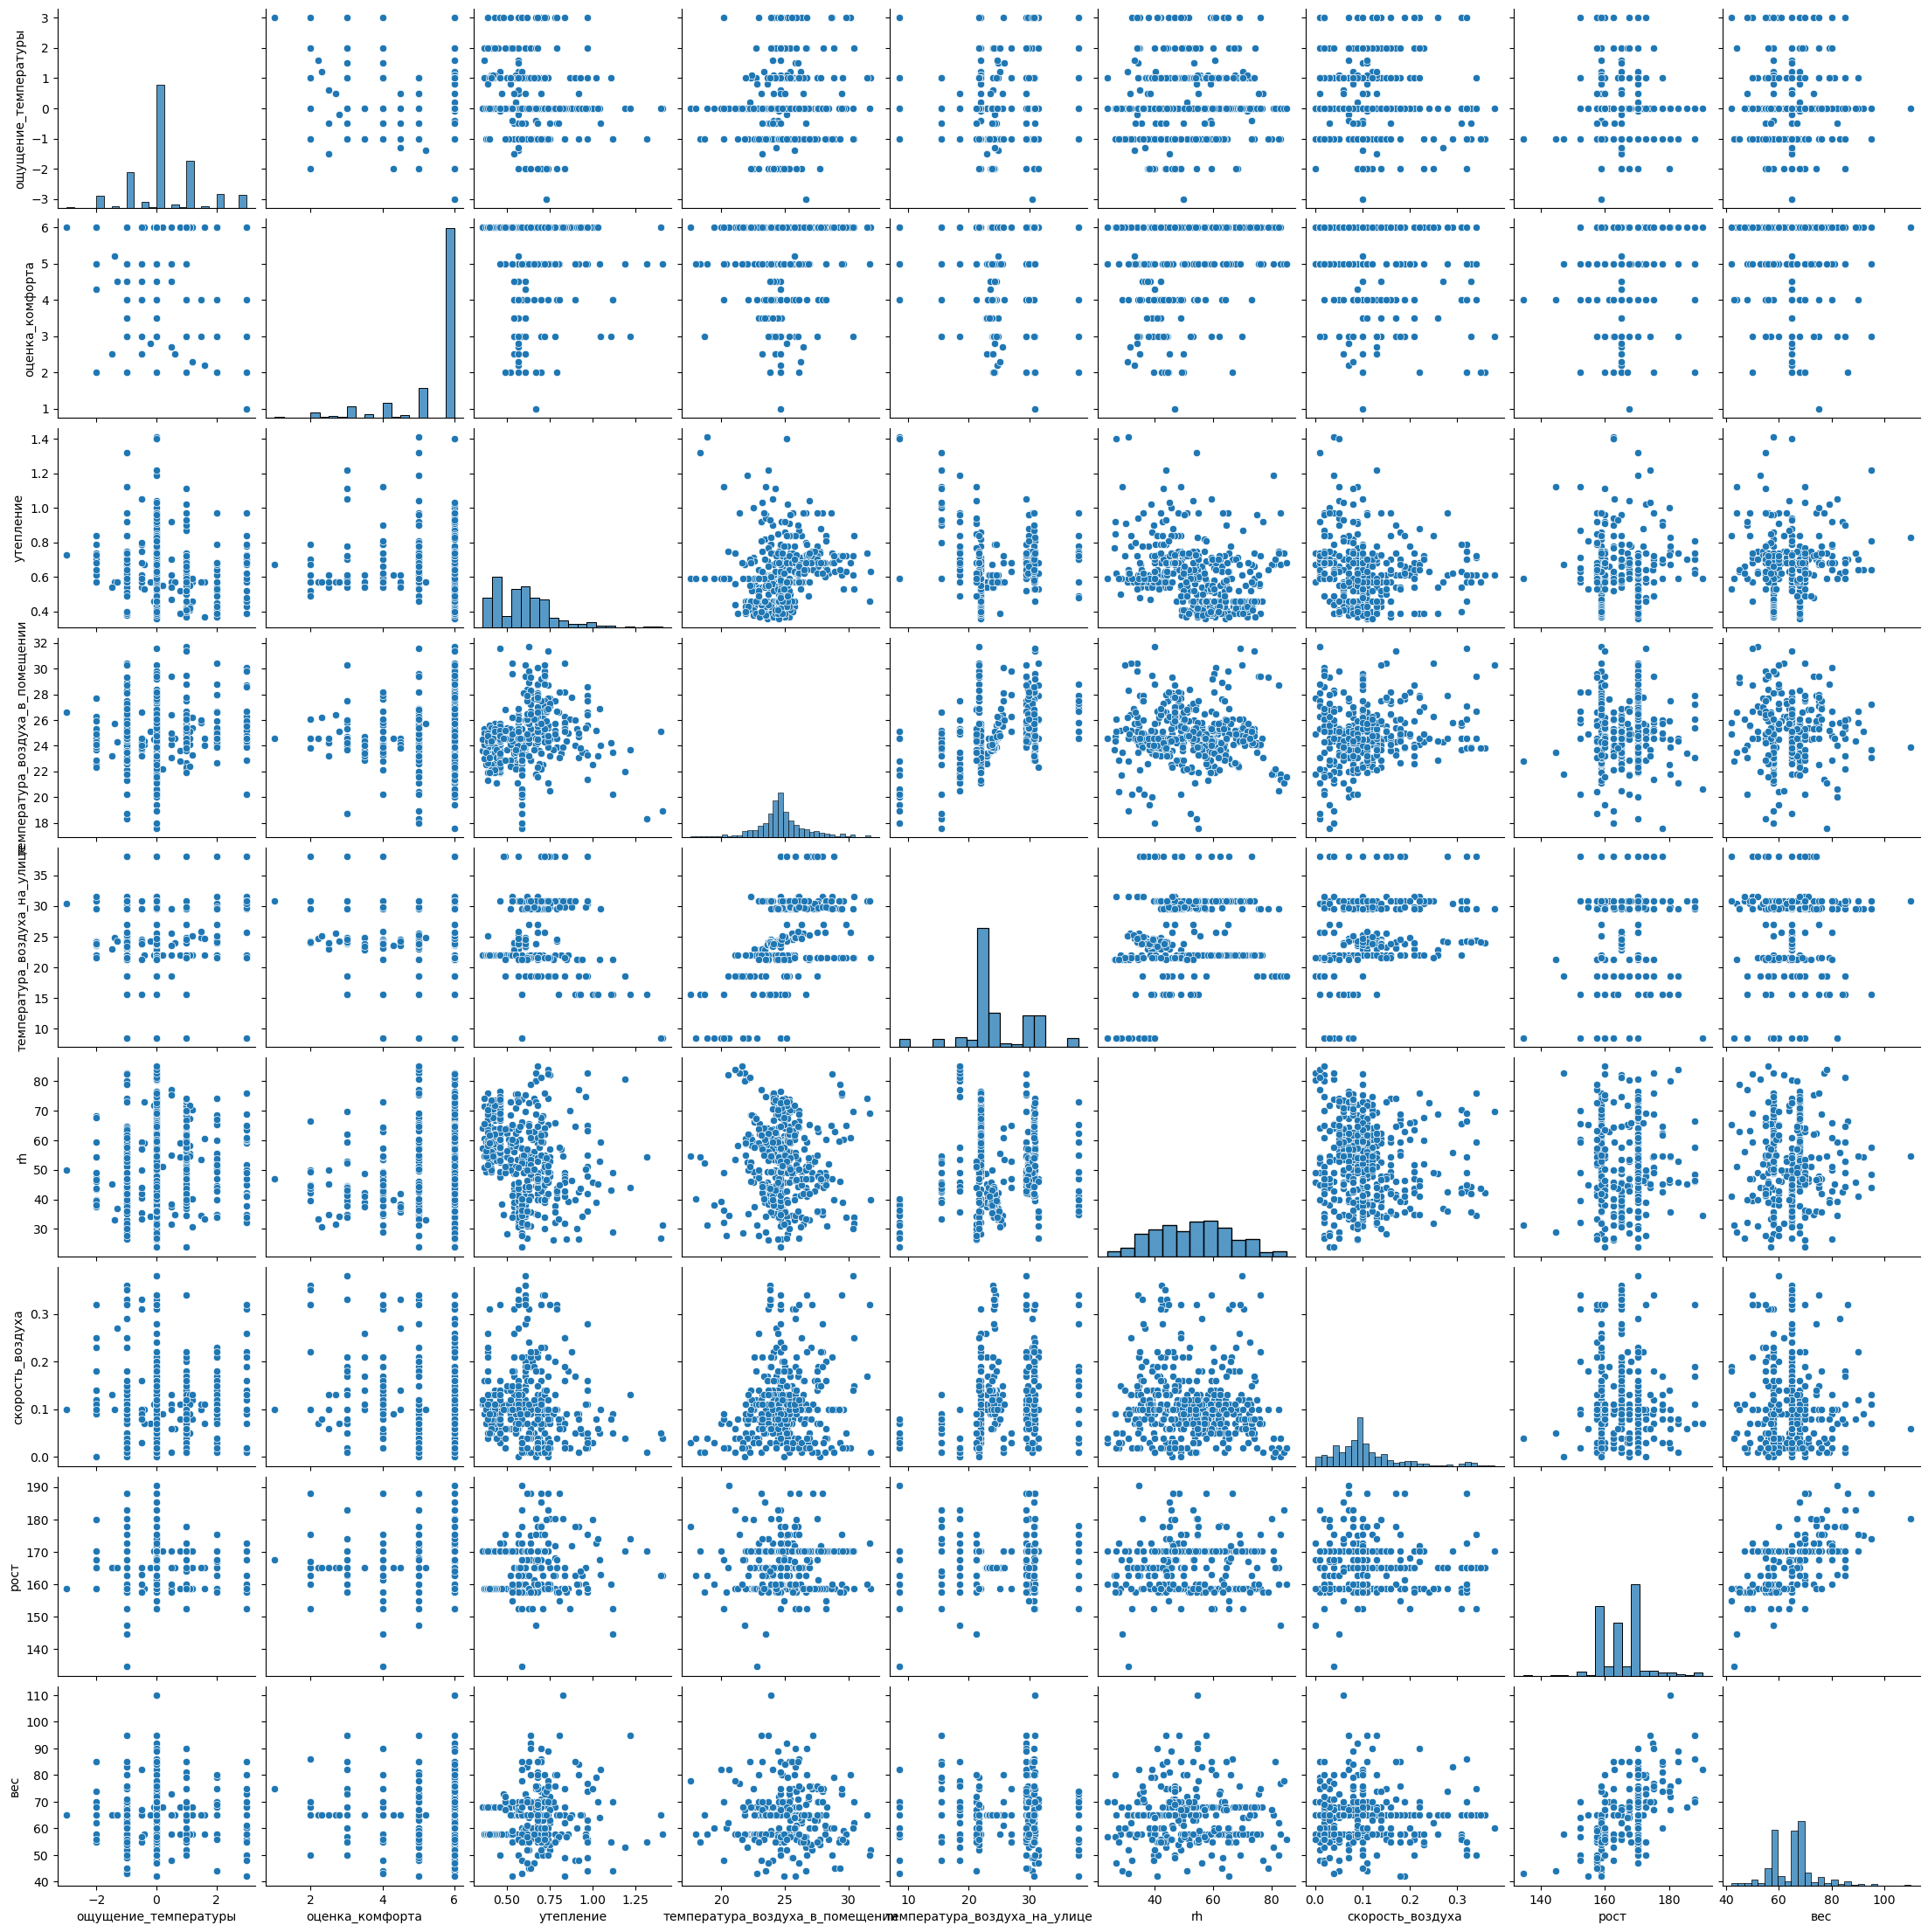

In [177]:
col = ['ощущение_температуры', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении', 'температура_воздуха_на_улице',
       'rh', 'скорость_воздуха', 'рост', 'вес']

sns.pairplot(df[col])

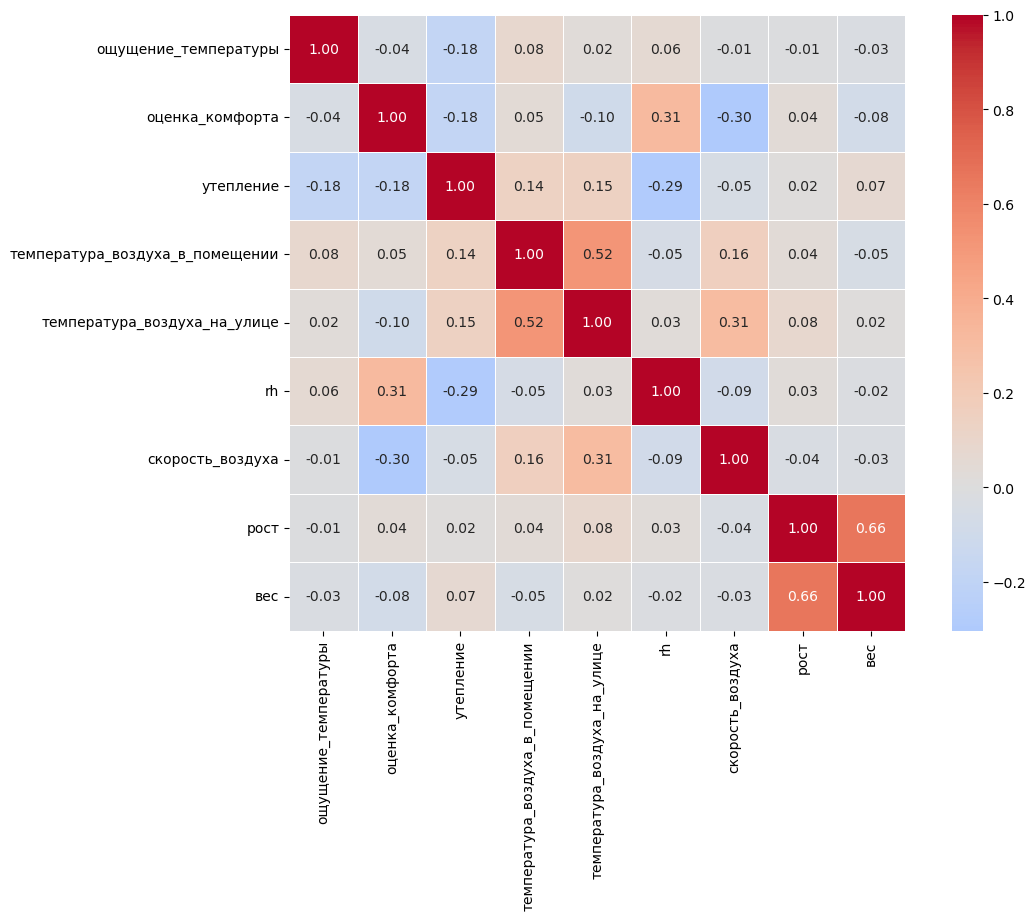

In [178]:
corr_matrix = df[col].corr() #потому что многие данные распределены нормально

plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(
    corr_matrix, 
    annot=True,  # показывать значения в ячейках
    fmt=".2f",   # формат чисел (2 знака после запятой)
    cmap="coolwarm",  # цветовая схема
    center=0,    # центр шкалы (0 для корреляции)
    linewidths=0.5,  # толщина линий между ячейками
    square=True   # квадратные ячейки
)

plt.show()

### Здесь видно чуть-чуть зависимостей: 
1) Сильно коррелируют рост и вес, что и логично - чем больше рост, тем больше вес
2) Температура воздуха в помещении и температура воздуха в помещении имеют более слабую корреляцию, но всё равно, это корреляция объяснима (температура дома будет теплее, если на улицу тепло, из-за теплообмена)
3) Слабо коррелируют утепление и относительная влажность, скорость воздуха и оценка комфорта, оценка комфорта и скорость воздуха, относительная влажность и температура воздуха в помещении. - все эти корреляции слабы, но всё равно имеют место быть.

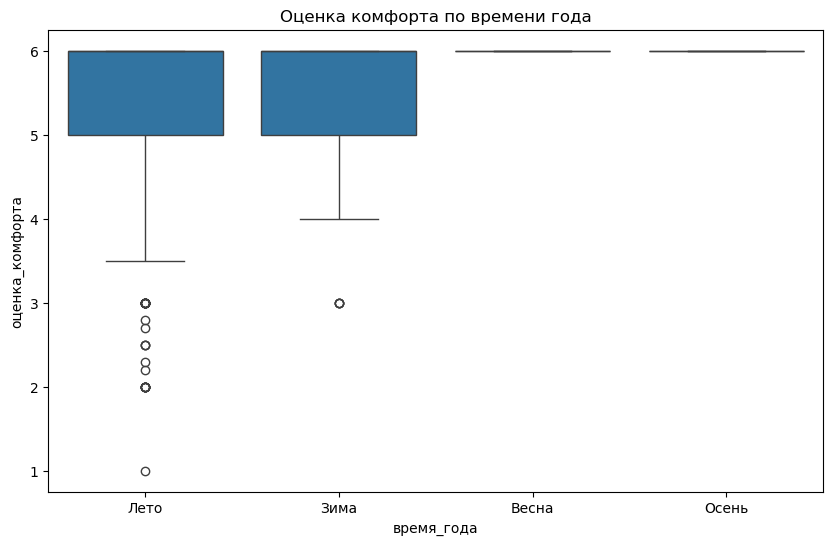

In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='время_года', y='оценка_комфорта', data=df)
plt.title('Оценка комфорта по времени года')
plt.show()

In [180]:
df_cross = pd.crosstab(df['пол'], df['оценка_комфорта_шкала'])
chi2 = chi2_contingency(df_cross)[0]
m, n = df_cross.shape
cr_k = (chi2 / (df_cross.sum().sum() * min(m - 1, n - 1))) ** 0.5
print(round(cr_k, 4))

0.3961


Вывод: от пола хоть и не сильно много, но зависит оценка комфорта

### Проверим влияет ли возраст на оценку комфорта

<Axes: xlabel='возраст', ylabel='оценка_комфорта'>

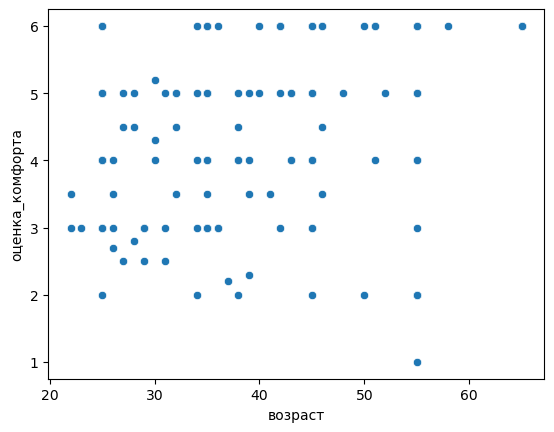

In [181]:
sns.scatterplot(x=df['возраст'], y=df['оценка_комфорта'])

In [182]:
corr = df[["оценка_комфорта", "rh"]].corr(method="spearman")
print(corr)

                 оценка_комфорта        rh
оценка_комфорта         1.000000  0.339714
rh                      0.339714  1.000000


### Отсюда видно, что оценка комфорта не сильно зависит от влажности

In [183]:
corr = df[["количество_рекламаций", "оценка_комфорта"]].corr()
print(corr)

                       количество_рекламаций  оценка_комфорта
количество_рекламаций               1.000000        -0.478521
оценка_комфорта                    -0.478521         1.000000


### Отсюда видно, что оценка комфорта зависит от кол-ва рекламаций: чем больше рекламаций тем ниже оценка комфорта

In [184]:
corr = df[["температура_воздуха_в_помещении", "количество_рекламаций"]].corr()
print(corr)

                                 температура_воздуха_в_помещении  \
температура_воздуха_в_помещении                         1.000000   
количество_рекламаций                                   0.005628   

                                 количество_рекламаций  
температура_воздуха_в_помещении               0.005628  
количество_рекламаций                         1.000000  


### Вывод: температура воздуха в помещении не влияет на кол-во рекламаций

# Проверка гипотез

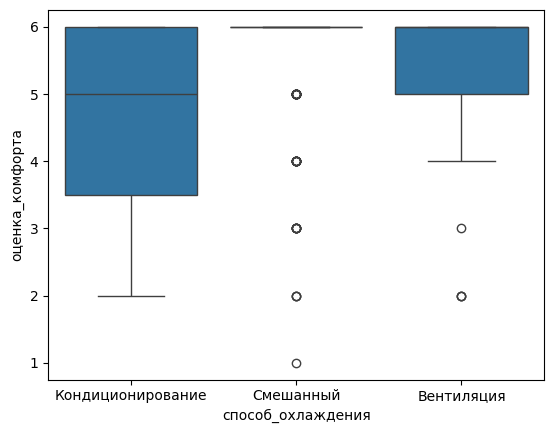

In [277]:
# Гипотеза номер 1: А влияет ли способ охлаждения на оценку комфорта?
# H0: категориальные переменные независимы.
# H1: категориальные переменные связаны между собой.

sns.boxplot(x = 'способ_охлаждения', y = 'оценка_комфорта', data = df)
plt.show()

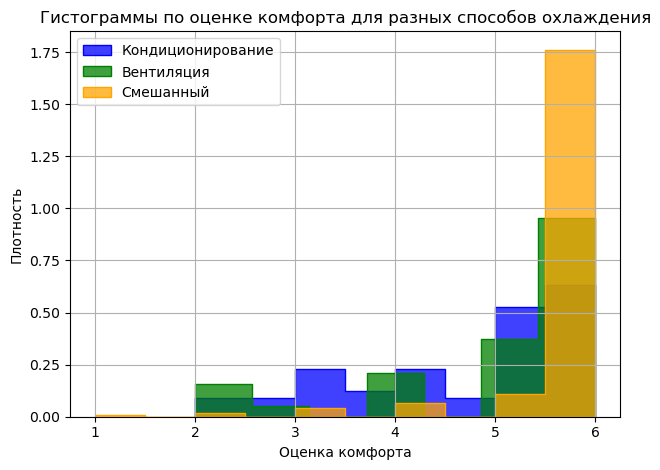

In [278]:
#Теперь проверяем данные на нормальность, чтобы выбрать между методом АНОВА или методом Крускала.
#Проверять их будем двумя методами для точности: Построим Гистограмму для визуального анализа и используем метод Шапира для математического.

#Уточнение: Нам нужно построить гистограммы для каждого способа охлождения, чтобы проверить нормальность.
sns.histplot(data=df[df['способ_охлаждения'] == 'Кондиционирование'], x='оценка_комфорта', color='blue', label='Кондиционирование', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['способ_охлаждения'] == 'Вентиляция'], x='оценка_комфорта', color='green', label='Вентиляция', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['способ_охлаждения'] == 'Смешанный'], x='оценка_комфорта', color='orange', label='Смешанный', kde=False, stat='density', element='step', fill=True)

# Настройки графика
plt.title('Гистограммы по оценке комфорта для разных способов охлаждения')
plt.xlabel('Оценка комфорта')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [279]:
#Итоги: Распредление не является нормальным, поэтому будем использовать метод Краскала-Уоллеса

br = df[df['способ_охлаждения'] == 'Кондиционирование']['оценка_комфорта']
br2 = df[df['способ_охлаждения'] == 'Смешанный']['оценка_комфорта']
br3 = df[df['способ_охлаждения'] == 'Вентиляция']['оценка_комфорта']

kruskal(br, br2, br3)

KruskalResult(statistic=138.79328368992984, pvalue=7.268108201822276e-31)

In [280]:
# Итоги гипотезы: значения p-value указывают на то, что существуют статистически значимые различия в уровне комфорта между группами. 
# Изучая наши box-plots, мы можем заметить, что смешанный способ кондиционирования зачастую оценивается на 6. В тоже время, средняя оценка комфорта кондиционнирования варируется между оценками 4, 5 и 6, а вентиляция оценивается между 5 и 6

In [281]:
# Теперь повторяем все тоже самое для следующих гипотез

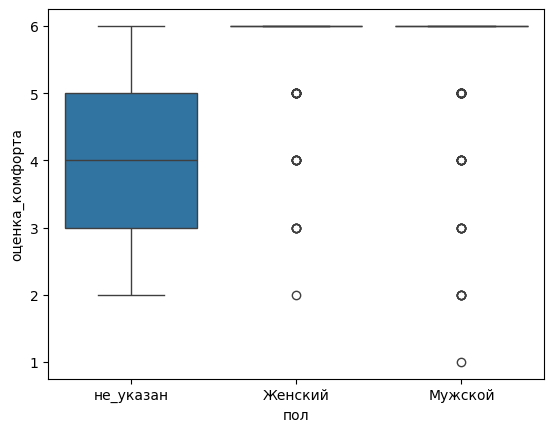

In [282]:
# Гипотеза номер 2: А влияет ли пол на оценку комфорта?
sns.boxplot(x = 'пол', y = 'оценка_комфорта', data = df)
plt.show()

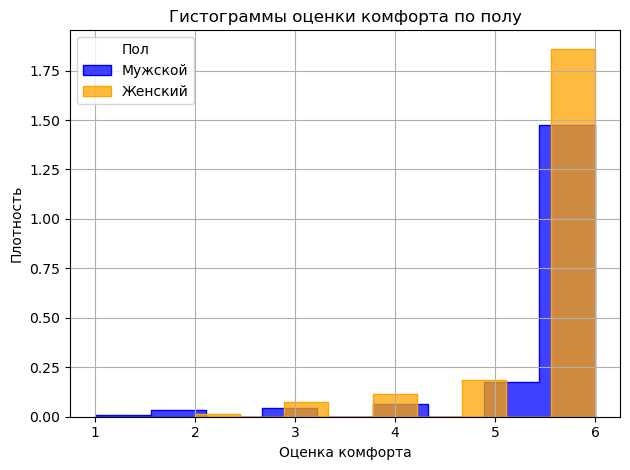

In [283]:
#Теперь проверяем данные на нормальность, чтобы выбрать между АНОВА или методом Крускала

# Построение гистограмм
sns.histplot(data=df[df['пол'] == 'Мужской'], x='оценка_комфорта', color='blue', label='Мужской', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['пол'] == 'Женский'], x='оценка_комфорта',color='orange', label='Женский', kde=False, stat='density', element='step', fill=True)

# Настройки графика
plt.title('Гистограммы оценки комфорта по полу')
plt.xlabel('Оценка комфорта')
plt.ylabel('Плотность')
plt.legend(title='Пол')
plt.grid(True)
plt.tight_layout()
plt.show()

In [284]:
#Итоги: Распределение не явлется нормальным, поэтому используем критерий Манна-Уитни
br = df[df['пол'] == 'Женский']['оценка_комфорта']
br2 = df[df['пол'] == 'Мужской']['оценка_комфорта']
mannwhitneyu(br, br2, alternative = 'two-sided')

MannwhitneyuResult(statistic=19966.0, pvalue=0.8432089192396829)

In [285]:
# Итоги гипотезы: нулевая гипотеза подтвердилась и пол ,скорее всего, не влияет на оценки комфорта. Это подтвеждается и в Боксплоте.

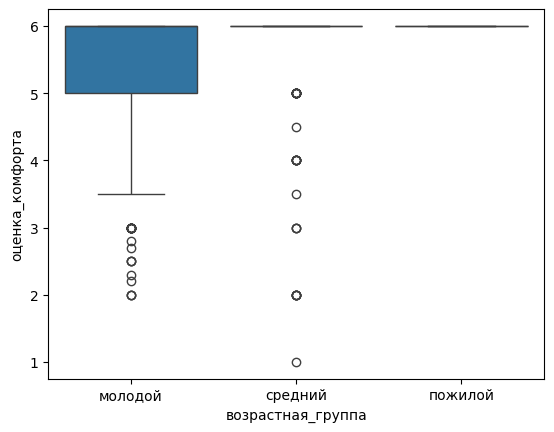

In [286]:
# Гипотеза номер 3: А влияет ли возрастная группа на оценку комфорта?
sns.boxplot(x = 'возрастная_группа', y = 'оценка_комфорта', data = df)
plt.show()

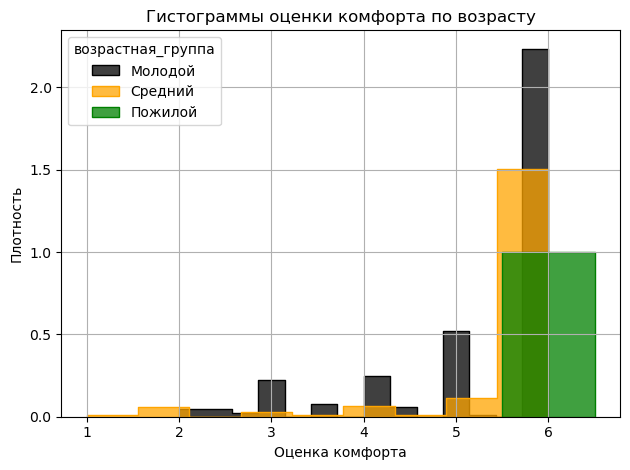

In [287]:
#Теперь проверяем данные на нормальность, чтобы выбрать между АНОВА или методом Крускала

# Построение гистограмм
sns.histplot(data=df[df['возрастная_группа'] == 'молодой'], x='оценка_комфорта', color='black', label='Молодой', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['возрастная_группа'] == 'средний'], x='оценка_комфорта',color='orange', label='Средний', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['возрастная_группа'] == 'пожилой'], x='оценка_комфорта', color='green', label='Пожилой', kde=False, stat='density', element='step', fill=True)
# Настройки графика
plt.title('Гистограммы оценки комфорта по возрасту')
plt.xlabel('Оценка комфорта')
plt.ylabel('Плотность')
plt.legend(title='возрастная_группа')
plt.grid(True)
plt.tight_layout()
plt.show()

In [288]:
#Итоги: Распредление не является нормальным, поэтому будем использовать метод Краскала-Уоллеса
br = df[df['возрастная_группа'] == 'молодой']['оценка_комфорта']
br2 = df[df['возрастная_группа'] == 'средний']['оценка_комфорта']
br3 = df[df['возрастная_группа'] == 'пожилой']['оценка_комфорта']
kruskal(br, br2, br3)

KruskalResult(statistic=24.436913656249256, pvalue=4.938460929081434e-06)

In [289]:
#Итоги: Нулевая гипотеза не подтвердилась, что значит возрастная группа влияет на среднюю оценку комфорта 
# Люди молодого возраста зачастую оценивают комфорт на 6 или 5(иногда даже 4), когда люди среднего возраста и пожилые люди ставят в большинстве 6.

In [290]:
# Гипотеза номер 4: Есть ли взаимосвязь между количеством рекламаций и оценкой комфорта?

# Подход к проверке этой гипотезы отличается, поскольку оба признака являются количественными.

#Начнем с построения матрицы корреляций, чтобы устроить быструю проверку корреляции
df[['количество_рекламаций', 'оценка_комфорта']].corr(method='pearson').style.background_gradient(cmap='cividis')

,количество_рекламаций,оценка_комфорта
количество_рекламаций,1.000000,-0.478521
оценка_комфорта,-0.478521,1.000000


In [291]:
# Матрица показывает, что они имеют отрицательную взаимосвязь и при увеличении одного показателя, второй уменьшается на 0.48 единиц
#Проверяем распределенние обоих критериев для выбора метода критерия: Критерий Пирсона или Спирмена

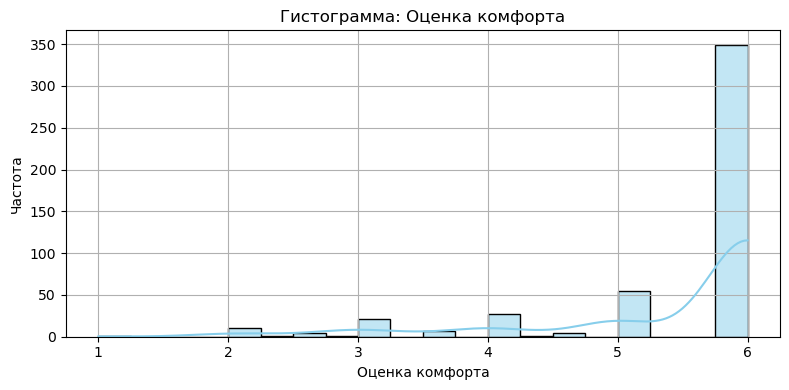

In [292]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='оценка_комфорта', bins=20, kde=True, color='skyblue')
plt.title('Гистограмма: Оценка комфорта')
plt.xlabel('Оценка комфорта')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

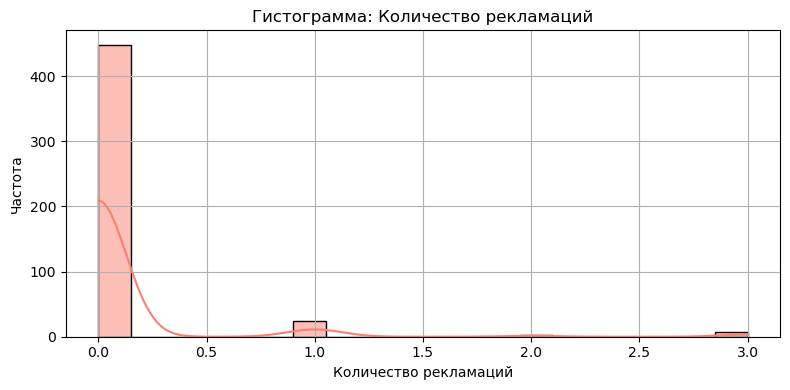

In [293]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='количество_рекламаций', bins=20, kde=True, color='salmon')
plt.title('Гистограмма: Количество рекламаций')
plt.xlabel('Количество рекламаций')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

In [294]:
#Оба признака не имеют нормального распределения, а значит, следует использовать критерий Спирмена.

In [299]:
spearmanr(df['количество_рекламаций'], df['оценка_комфорта'])

SignificanceResult(statistic=-0.4979492737248686, pvalue=1.4452613124232027e-31)

In [300]:
#Итоги гипотезы: Количество рекламаций и оценка комфорта обратно пропорциональны, что можно увидеть в матрице корреляций и в критерии Спирмена.

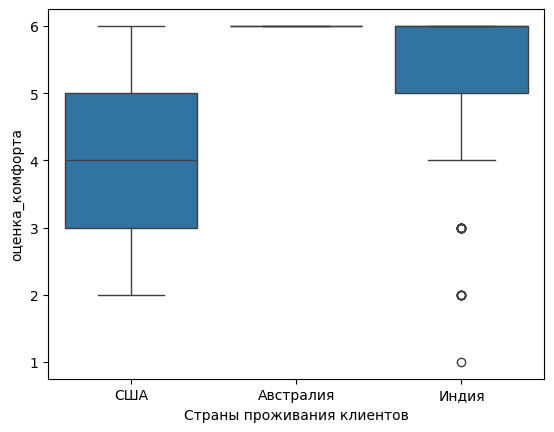

In [301]:
# Гипотеза 5: Отличается ли средняя оценка комфорта в зависимости от страны
sns.boxplot(x = 'страна', y = 'оценка_комфорта', data = df)
plt.xlabel('Страны проживания клиентов')
plt.show()

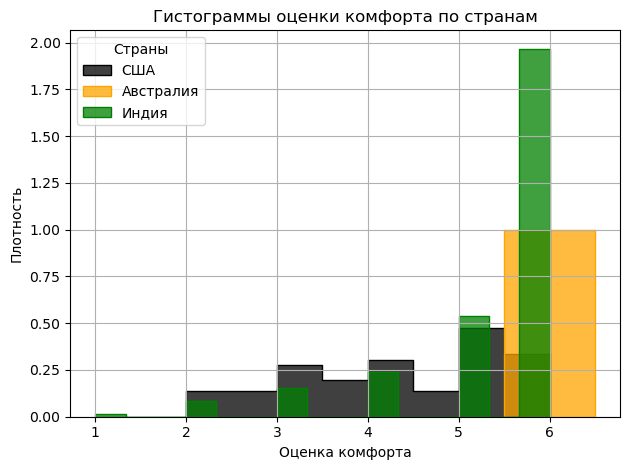

In [302]:
#Теперь проверяем данные на нормальность, чтобы выбрать между АНОВА или методом Крускала

# Построение гистограмм
sns.histplot(data=df[df['страна'] == 'США'], x='оценка_комфорта', color='black', label='США', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['страна'] == 'Австралия'], x='оценка_комфорта',color='orange', label='Австралия', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['страна'] == 'Индия'], x='оценка_комфорта', color='green', label='Индия', kde=False, stat='density', element='step', fill=True)
# Настройки графика
plt.title('Гистограммы оценки комфорта по странам')
plt.xlabel('Оценка комфорта')
plt.ylabel('Плотность')
plt.legend(title='Страны')
plt.grid(True)
plt.tight_layout()
plt.show()

In [303]:
#Итоги: Распредление не является нормальным, поэтому будем использовать метод Краскала-Уоллеса

br = df[df['страна'] == 'США']['оценка_комфорта']
br2 = df[df['страна'] == 'Австралия']['оценка_комфорта']
br3 = df[df['страна'] == 'Индия']['оценка_комфорта']

kruskal(br, br2, br3)

KruskalResult(statistic=195.4744276549536, pvalue=3.57492848327363e-43)

In [304]:
#Итоги: Нулевая гипотеза не подтвердилась, что значит страна проживания клиента влияет на среднюю оценку комфорта
# Клиенты из США варирует оценку удовлетворенности от 3 до 5, не исключая оценок от 2 до 3 и от 5 до 6. Австралийцы в среднем оценивают уровень комфорта в 6 баллов, а Индийцы оценивают его в среднем 5-6 баллов, иногда в 4-5 балла

In [305]:
#Три новые гипотезы, выдвигаемые нашей командой:

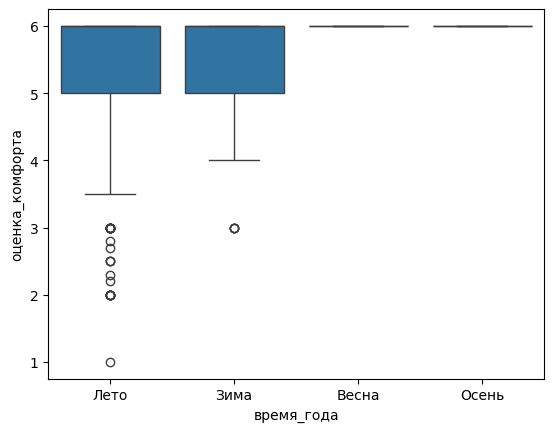

In [306]:
#Первое: Изменяется ли оценка комфорта в разные времена года?
sns.boxplot(x = 'время_года', y = 'оценка_комфорта', data = df)
plt.show()

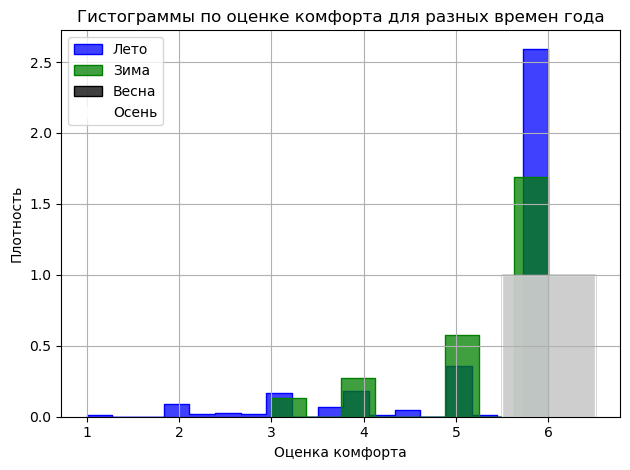

In [307]:
#Теперь проверяем данные на нормальность, чтобы выбрать между методом АНОВА или методом Крускала.

sns.histplot(data=df[df['время_года'] == 'Лето'], x='оценка_комфорта', color='blue', label='Лето', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['время_года'] == 'Зима'], x='оценка_комфорта', color='green', label='Зима', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['время_года'] == 'Весна'], x='оценка_комфорта', color='black', label='Весна', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['время_года'] == 'Осень'], x='оценка_комфорта', color='white', label='Осень', kde=False, stat='density', element='step', fill=True)

# Настройки графика
plt.title('Гистограммы по оценке комфорта для разных времен года')
plt.xlabel('Оценка комфорта')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [308]:
#Примечание: Гистограммы Весны и Осени имеют практически одинаковые размеры, поэтмоу они вместе формируют серый прямоугольник.

In [309]:
#Итоги: Распредление не является нормальным, поэтому будем использовать метод Краскала-Уоллеса
br = df[df['время_года'] == 'Лето']['оценка_комфорта']
br2 = df[df['время_года'] == 'Зима']['оценка_комфорта']
br3 = df[df['время_года'] == 'Весна']['оценка_комфорта']
br4 = df[df['время_года'] == 'Осень']['оценка_комфорта']

kruskal(br, br2, br3, br4)

KruskalResult(statistic=13.335304191700327, pvalue=0.003964848384998934)

In [310]:
# Итоги гипотезы: значения p-value указывают на то, что существуют статистически значимые различия в уровне комфорта между группами. 
# Изучая наши box-plots, мы можем заметить, что все оценки комфорта Весной и Осенью имеют значение 6, без исключений. Летом и Зимой оценки варируются больше: от 5 до 6

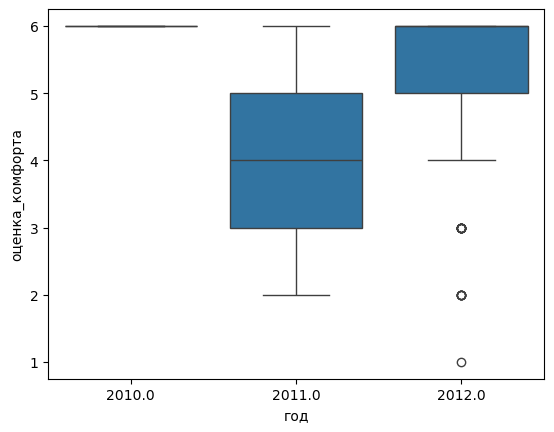

In [311]:
#Второе: Изменилась ли средняя оценка комфорта с течением времени(разные года)
sns.boxplot(x = 'год', y = 'оценка_комфорта', data = df)
plt.show()

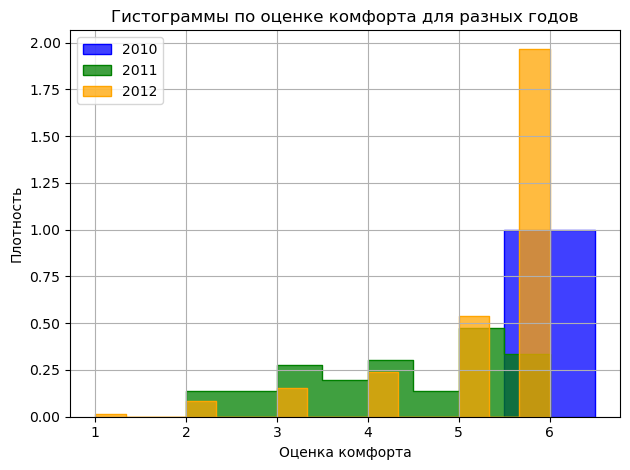

In [312]:
#Теперь проверяем данные на нормальность, чтобы выбрать между методом АНОВА или методом Крускала.

sns.histplot(data=df[df['год'] == 2010.0], x='оценка_комфорта', color='blue', label='2010', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['год'] == 2011.0], x='оценка_комфорта', color='green', label='2011', kde=False, stat='density', element='step', fill=True)
sns.histplot(data=df[df['год'] == 2012.0], x='оценка_комфорта', color='orange', label='2012', kde=False, stat='density', element='step', fill=True)

# Настройки графика
plt.title('Гистограммы по оценке комфорта для разных годов')
plt.xlabel('Оценка комфорта')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [313]:
#Итоги: Распредление не является нормальным, поэтому будем использовать метод Краскала-Уоллеса

br = df[df['год'] == 2010.0]['оценка_комфорта']
br2 = df[df['год'] == 2011.0]['оценка_комфорта']
br3 = df[df['год'] == 2012.0]['оценка_комфорта']

kruskal(br, br2, br3)

KruskalResult(statistic=195.4744276549536, pvalue=3.57492848327363e-43)

In [314]:
# Итоги гипотезы: значения p-value указывают на то, что существуют статистически значимые различия в уровне комфорта между группами. 
# Изучая наши box-plots, мы можем заметить, что в 2010 все оценки комфорта равны 6, в 2011 году большинство оценок распределенны равномерно от 2 до 6, а в 2012 большинство лежат в отрезке от 5 до 6, с редкими выбросами

In [315]:
#Третье, зависит ли оценка комфорта от среднемесячной температуры на улице

In [316]:
#Начнем с построения матрицы корреляций, чтобы устроить быструю проверку корреляции
df[['среднемесячная_температура_улица', 'оценка_комфорта']].corr(method='pearson').style.background_gradient(cmap='cividis')

,среднемесячная_температура_улица,оценка_комфорта
среднемесячная_температура_улица,1.000000,-0.287904
оценка_комфорта,-0.287904,1.000000


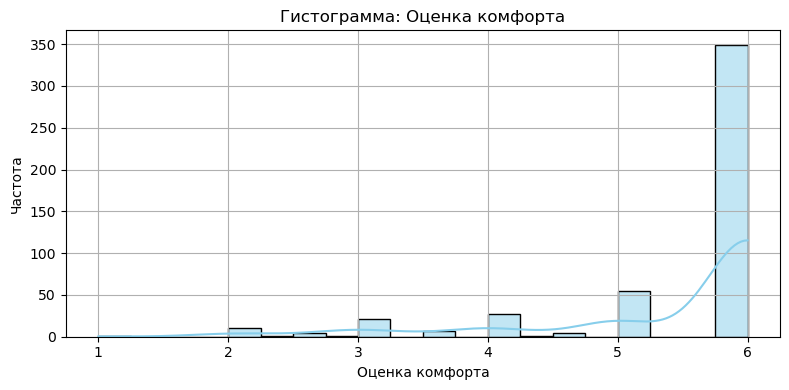

In [317]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='оценка_комфорта', bins=20, kde=True, color='skyblue')
plt.title('Гистограмма: Оценка комфорта')
plt.xlabel('Оценка комфорта')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

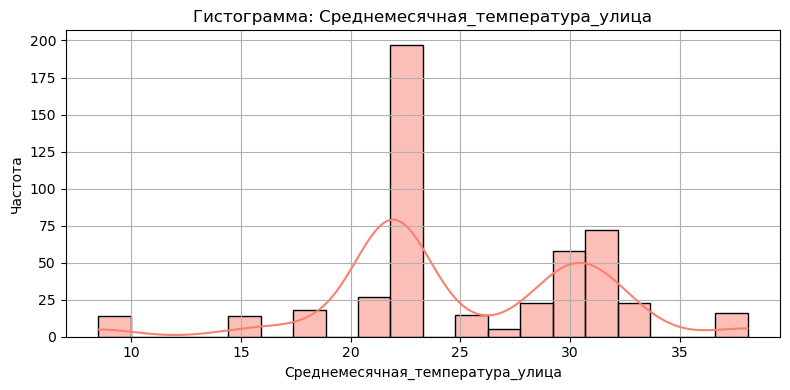

In [318]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='среднемесячная_температура_улица', bins=20, kde=True, color='salmon')
plt.title('Гистограмма: Cреднемесячная_температура_улица')
plt.xlabel('Cреднемесячная_температура_улица')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

In [319]:
#Оба признака не имеют нормального распределения, а значит, следует использовать критерий Спирмена.

In [320]:
spearmanr(df['среднемесячная_температура_улица'], df['оценка_комфорта'])

SignificanceResult(statistic=-0.3389997978309549, pvalue=1.994875263852852e-14)

In [ ]:
#Итоги: Оба критерия коррелируют, но являются обратно пропорциональными.Это подтверждается в критерии Спирмена и в матрице корреляций.

# Построение линейной регрессии

7.1. Выбираем независимые и зависимую переменные для нашей модели

In [261]:
features = [
    'температура_воздуха_на_улице', 'утепление', 'вентилятор', 
    'отопление', 'способ_охлаждения'
]
X = df[features]
y = df['температура_воздуха_в_помещении']

Разделяем значения на тренировочные и тестовые, чтобы позже проверить точность модели.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Проводим категоризацию

In [271]:
categorical_cols = [
    'способ_охлаждения', 'вентилятор', 'отопление']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown = 'ignore')  
X_train_cat = encoder.fit(X_train[categorical_cols])

In [272]:
def get_ohe(train, categ):
    '''
    Функция для ohe_категоризации необходимых столбцов и последующего объединения с количественными столбцами
    
    На вход: выборка трайн или тест И названия категориальных столбцов
    '''
    temp_df = pd.DataFrame(data=encoder.transform(train[categ]), columns=encoder.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data


x_train_cat = get_ohe(X_train, categorical_cols)
x_test_cat = get_ohe(X_test, categorical_cols)

Построение модели

In [273]:
lin_regr = LinearRegression()
lin_regr.fit(x_train_cat, y_train)

LinearRegression()

In [274]:
train_prediction = lin_regr.predict(x_train_cat)
test_prediction = lin_regr.predict(x_test_cat)

Проверим показатели модели, чтобы узнать качество нашей моедли

In [275]:
def metrics_model(fact, prediction):
    """
    функции выводит метрики качества для регрессионных моделей (точность модели).
    """
    print('R2 = ', round(r2_score(fact, prediction),2))
    print('MAPE = ', round(mean_absolute_percentage_error(fact, prediction)*100,2), 'процентов')
    print('ME = ', round(mean_absolute_error(fact, prediction),2))
    print('MSE = ', round(mean_squared_error(fact, prediction),2))
    print('MUSE = ', round(mean_squared_error(fact, prediction)*10.5))

In [276]:
metrics_model(y_train, train_prediction)
metrics_model(y_test, test_prediction)

R2 =  0.34
MAPE =  4.52 процентов
ME =  1.12
MSE =  2.68
MUSE =  28
R2 =  0.1
MAPE =  4.89 процентов
ME =  1.23
MSE =  2.67
MUSE =  28


## Итоги: Наша модель не слишком хорошо предсказывает температуру воздуха в помещении. Главный показатель точности - R^2, имеет значение 0.1 в тестовом варианте, что очень маленький показатель. 